# Project Python Foundations: FoodHub Data Analysis

*Submitted by Tuesday Frase: May 18, 2024*



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary


* **order_id:** Unique ID of the order
* **customer_id:** ID of the customer who ordered the food
* **restaurant_name**: Name of the restaurant
* **cuisine_type:** Cuisine ordered by the customer
* **cost_of_the_order:** Cost of the order
* **day_of_the_week:** Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* **rating:** Rating given by the customer out of 5
* **food_preparation_time:** Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* **delivery_time:** Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Assumptions

* **Currency:** - Since no currency code was provided, but all restaurants are in New York City, this analysis assumes USD for all financial analysis.

### Approach

To perform this analysis, we will:
1. Understand the problem.
2. Import and review the data and data types.
3. Decide how to handle any missing/invalid values.
4. Investigate data via univariate analysis.
5. investigate data via multivariate analysis.
6. Document observations and make recommendations.     

### Problem Statement
FoodHub is seeking to understand restaurant demand so that the company can improve the customer experience.

In addition, given the dataset, we can also offer other insights through observations on the data, such as restaurant profitabiliy (a side effect of demand). The company may be able to use this information to adjust its services.

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
# Note: The provided version of pandas in the template gave an error: "google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible."
#       To resolve this, I updated the pandas version to 2.0.3. and ran this once. Commenting out for subsequent runs.
#!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define path to location of notebooks in Google Drive.
# The line below sets a path variable that makes it easy for me to reference course-specific files within a complex personal folder structure.
# My absolute Google Drive path
path = r'/content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/0-Python Foundations/Project/'
print(path)

/content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/0-Python Foundations/Project/


In [ ]:
# Create a pandas dataframe and read in data from a CSV file, using the path above.
df = pd.read_csv(path + 'foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows

# To preview the top 5 rows, we can use the head() method and specify the number of rows to return. By default this is not sorted.
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here

# To find the number of rows, we can use the shape() method.
print('The dataset has',df.shape[0], 'rows and', df.shape[1], 'columns')

The dataset has 1898 rows and 9 columns


#### Observations:

This dataset has:

*   1898 rows
*   9 columns




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

First, we should look at the counts and types for each series in the dataframe.

In [ ]:
# Write your code here

# To find the datatypes and non-null counts for each column, we can use the info() method.
print(df.info())

# However, since we only need to find the datatypes, let's extract the information using the type() method instead.
data_types = df.dtypes

# Next, let's print just the column name and data type.
print('\nThe datatypes for each column in the dataset are as follows:\n')
data_types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None

The datatypes for each column in the dataset are as follows:



order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

Next, can decide whether each of these is categorical or numerical in nature. Later, this will affect how we need analyze single variables and relationships between different variables.

The following series are interpreted as numerical, but aren't really numbers we will use for statistics:
*   order_id: int64
*   customer_id: int64

The following series are objects (strings) suited for categorical vs. numerical analysis.
*   restaurant_name: object
*   cuisine_type: object
*   day_of_the_week: object
*   rating: object

Finally, these series are true numbers and can be used with statistical methods.
*   cost_of_the_order: float64
*   food_preparation_time: int64
*   delivery_time: int64

In [ ]:
# Let's view the statistics for the numerical columns.
# I chose to alter the format to show only 4 decimal places instead of exponential notation, since we don't need to rely on highly precise decimals for this particular dataset.
pd.options.display.float_format = '{:.2f}'.format

print('\nHere is useful information for the numerical values in the dataset:\n')
df.describe().T


Here is useful information for the numerical values in the dataset:



,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [ ]:
# Let's retrieve and preview the categorical column values by copying them into a list.
list_catcol = df.select_dtypes(include=['object']).columns.to_list()

print('\nHere is useful information for the categorical values in the dataset:\n')

# Use a simple for loop to show the counts and the contribution as a percentage of the entire series.
for col in list_catcol:
  print('\nPreview counts for:',df[col].value_counts())
  print('\nPreview percentage breakdown for:',df[col].value_counts(normalize=True))



Here is useful information for the categorical values in the dataset:


Preview counts for: restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

Preview percentage breakdown for: restaurant_name
Shake Shack                 0.12
The Meatball Shop           0.07
Blue Ribbon Sushi           0.06
Blue Ribbon Fried Chicken   0.05
Parm                        0.04
                            ... 
Sushi Choshi                0.00
Dos Caminos Soho            0.00
La Follia                   0.00
Philippe Chow               0.00
'wichcraft                  0.00
Name: proportion, Length: 178, dtype: float64

Preview counts for: cuisine_

In [ ]:
# Next, let's retrieve and preview the numerical column values, also using a list.
list_numcol = df.select_dtypes(exclude=['object']).columns.to_list()

# Since I know that order and customer IDs have no statistical value, I used the remove() action on the list to remove those two values.
list_numcol.remove('order_id')
list_numcol.remove('customer_id')

# I used a for loop to show the counts and percent contribution of each.
for col in list_numcol:
  print('\nPreview counts for:',df[col].value_counts())
  print('\nPreview % breakdown for:',df[col].value_counts(normalize=True))


Preview counts for: cost_of_the_order
12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: count, Length: 312, dtype: int64

Preview % breakdown for: cost_of_the_order
12.18   0.05
12.13   0.04
12.23   0.02
24.20   0.02
29.10   0.02
        ... 
5.48    0.00
17.07   0.00
6.26    0.00
9.61    0.00
29.59   0.00
Name: proportion, Length: 312, dtype: float64

Preview counts for: food_preparation_time
21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: count, dtype: int64

Preview % breakdown for: food_preparation_time
21   0.07
23   0.06
27   0.06
22   0.06
28   0.06
24   0.06
20   0.06
30   0.06
33   0.06
35   0.06
31   0.06
26   0.06
25   0.06
34   0.06
32   0.06
29   0.06
Name: proportion, dtype: float64

Preview counts for: delivery_time
24    162
28    148
29    148
26    141
27    138
30

In [ ]:
# For rating, we may wonder why rating is an object.
# By inspecting the unique values using the value_counts() method, we can see it has many "Not given" entries, and therefore that series is a string.
print(df['rating'].value_counts())
print(df['rating'].value_counts(normalize=True))

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
rating
Not given   0.39
5           0.31
4           0.20
3           0.10
Name: proportion, dtype: float64


#### Observations:

Here are some observations about the dataset structure, based on checking the data types and previewing the dataset.
*   No NULL data exists. However, we are missing a number of ratings (over 30%).
*   Four columns are of type object (string).
*   Four columns are of type int64 and one is of type float64, so we have five numerical columns we can inspect using describe().
*   Since customer_id and order_id are identifiers and not truly numerical data, we can ignore for statistical assessments.
*   Though we might expect rating to be numerical, the majority of rating values are "Not given", so it is a categorical value vs. numerical. We will need to figure out how to treat this in the next question (either by removing or imputing the values).


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here

# First, let's check for NULL values by using sum to count the missing values by column.
print(df.isnull().sum())

# We can also check row counts with info() to see if any cells are missing data. All series should have the same counts if no values are missing.
print(df.info())


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
No

#### Observations:

*   Our dataset contains 1898 rows of data, and every column for each row has a value.
*   Since the number of non-null values is the same for each series (1898), we know no values are missing/NULL.
*   The *Ratings* column contains "Not rated" as well as numbers represented as strings.

An important decision at this point: How should we treat the "Not given" rating values? We have two options - either remove those rows, or impute the values using the mean, median or mode value of other rows.

*   In this dataset, "Not given" comprises nearly 40% of all ratings.
  *   Imputing the values doesn't make sense in this case because it can falsely skew our analysis.
  *   Therefore, we will copy the dataframe and use only the rows with actual ratings, when analyzing ratings.
  *   Before we can do any statistical analysis, however, we will still need to convert the object (string) values to another type on which we can perform numerical analysis.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Earlier, we created a numerical column list. We can reuse this here in another for loop to review the statistical data and key points.

for col in list_numcol:
  print('\nPreview min/max/range for:',df[col].name,'\n   min:',df[col].min(),'| max:',df[col].max(), '| range:', df[col].max() - df[col].min(), '| mean:',df[col].mean(), '| mode:', df[col].mode()[0])



Preview min/max/range for: cost_of_the_order 
   min: 4.47 | max: 35.41 | range: 30.939999999999998 | mean: 16.498851422550054 | mode: 12.18

Preview min/max/range for: food_preparation_time 
   min: 20 | max: 35 | range: 15 | mean: 27.371970495258168 | mode: 21

Preview min/max/range for: delivery_time 
   min: 15 | max: 33 | range: 18 | mean: 24.161749209694417 | mode: 24


In [ ]:
# Write your code here

# Because the numbers are displayed in exponential notation, let's also limit floats to two decimal places.
# Our dataset will not be materially impacted by doing this, since we are not dealing with high-precision values, and this option only sets the display.
pd.set_option('display.float_format', '{:.2f}'.format)

# Get the statistical summary with describe(), and use .T to make it easier to read (best display for datasets with many series).
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

Once an order is placed, it takes some amount of time to prepare the food for delivery. Then, the order must be delivered.

The information below descibes the time for each, in minutes.

*   The minimum time to prepare an order is **20 minutes**.
*   The maximum time to prepare an order is **35 minutes**.
*   The mean (average) time to prepare an order **27.37 minutes**.
*   For both delivery time and preparation time, the mean and median are close in value, and the data does not appear skewed.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here

# To find the number of unrated orders, we can use the value_counts method
# This returns the rating values, along with the occurrences for each count.
print(df['rating'].value_counts())

# To break this down as a percentage, we can pass in the normalize parameter.
print(df['rating'].value_counts(normalize=True))

# 736 of 1898 orders (39%) - no rating
# 588 of 1898 orders (31%) - 5
# 386 of 1898 orders (20%) - 4
# 188 of 1898 orders (10%) - 3

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
rating
Not given   0.39
5           0.31
4           0.20
3           0.10
Name: proportion, dtype: float64


#### Observations:

*   Most orders did not recieve a rating (**736** of 1898 orders, or **39%** of all orders).



## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Write the code here

# First, let's recall what our columns are, and the types of data they represent. We can reuse our lists from earlier.
print('Categorical data:', list_catcol)
print('Numerical data:', list_numcol)

Categorical data: ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']
Numerical data: ['cost_of_the_order', 'food_preparation_time', 'delivery_time']


In [ ]:
# Recall total row counts: We have 1898 rows total
print(df.shape[0])

# Check counts, unique counts and duplicate values for each column. Based on this, we can decide how to approach each variable.
for col in df:
  duplicate_count = df[col].count()-df[col].nunique()
  print('Series', col, 'has', df[col].nunique(),'unique values and', duplicate_count, 'duplicates.')

# We know now that some values repeat in various columns.


1898
Series order_id has 1898 unique values and 0 duplicates.
Series customer_id has 1200 unique values and 698 duplicates.
Series restaurant_name has 178 unique values and 1720 duplicates.
Series cuisine_type has 14 unique values and 1884 duplicates.
Series cost_of_the_order has 312 unique values and 1586 duplicates.
Series day_of_the_week has 2 unique values and 1896 duplicates.
Series rating has 4 unique values and 1894 duplicates.
Series food_preparation_time has 16 unique values and 1882 duplicates.
Series delivery_time has 19 unique values and 1879 duplicates.


In [ ]:
# The functions below are defined here so we can avoid repeating similar code for commonly used plots.
# These functions are called throughout this notebook.

# This function prints a barplot and a boxplot side by side.
def print_dual_box_bar_plots(data, column, width, height):
  """ Print a side-by-side countplot and boxplot
      with title and labels """

  # set figure size
  plt.figure(figsize=(width, height))

  # find the counts for the column and sort
  value_counts_df = df[column].value_counts().reset_index()
  value_counts_df.columns = [column, 'count']
  sorted_df = value_counts_df.sort_values(by='count', ascending=False)

  # define first plot
  plt.subplot(1, 2, 1)
  title1 = 'Histogram for: ' + column
  plt.tight_layout()
  plt.xticks(rotation=90)
  sns.barplot(data=sorted_df, x=column, y='count', hue=column)
  plt.title(title1)
  plt.xticks(rotation=90)

  # define second plot
  plt.subplot(1, 2, 2)
  title2 = 'Boxplot for: ' + column
  sns.boxplot(data=df,x=column);
  plt.title(title2)
  plt.xticks(rotation=90)

# This function prints a boxplot with several controllable options, including size and title
def print_boxplot(data, column, width, height, titleText):
  """ Print a single boxplot with title and labels """

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)

  # define plot
  sns.boxplot(data=df,x=column);
  plt.show()

# This function prints a barplot with several controllable options, including hue, top N count, size and title
def print_barplot(data, xCol, yCol, width, height, titleText, hue=None, topRowCount=None):
  """ Print a single barplot with title and labels using a pivot table """

  # set figure size and other elements
  plt.figure(figsize=(width, height))
  plt.title(titleText)
  plt.xticks(rotation=90)
  plt.xlabel(xCol)
  plt.ylabel(yCol)

  # dynamically set the hue and top N rows based on values passed in
  if hue == None:
    if topRowCount == None:
        sns.barplot(data=data, x=xCol, y=yCol);
    else:
        sns.barplot(data=data.head(topRowCount), x=xCol, y=yCol);
  else:
    if topRowCount == None:
      sns.barplot(data=data, x=xCol, y=yCol, hue=xCol);
    else:
      sns.barplot(data=data.head(topRowCount), x=xCol, y=yCol, hue=xCol);

# This function prints a histogram with several controllable options, including hue, size and title
def print_histogram(data, column, width, height, titleText, hue=None):
  """ Print a single, sorted histogram with title and labels and optional hue"""

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)
  plt.xticks(rotation=90)

  # dynamically set the hue if passed in
  if hue == None:
    sns.histplot(data=df,x=column, legend=False);
  else:
    sns.histplot(data=df,x=column, hue=column, legend=False);

# This function prints a violin plot with several controllable options, including size and title
def print_violin(data, column, width, height, titleText):
  """ Print a single, violin plot with title and labels """

  # set figure size and title
  plt.figure(figsize=(width, height))
  plt.title(titleText)

  # define plot
  sns.violinplot(data=df,x=column);

**Series: order_id**

We already know there are 1898 values, all unique, and none are duplicated. There is a 1:1 relationship between a delivery order and the order_id (no duplicates).

Much of our pending analysis will involve counting the number of orders across other categorical variables. However, there is not much utility in trying to create plots around order_id alone. Orders are  associated with customers and restaurants for analytical purposes.

The order_id value is being included when we run describe(); however, this is not a true numerical value and will be used for aggregating counts.



**Series: customer_id**

We  know there are 1200 unique values out of the entire set of 1898 values. This indicates that some customers have placed multiple orders.

Similarly to order_id, looking at customer_id in univariate analysis doesn't tell us much. Later, we can likely make some key observations by looking at customers who frequent certain restaurants.

And again, customer_id value is being included when we run describe() even though it is not a true numerical value.

**Series: restaurant_name**

We can see that 178 restaurants exist, and since we know we have 1898 rows, restaurants can have many orders.

We can't tell much about restaurants without using other variables. In our multivariate analysis, we'll be interested to understand what makes these restaurants so popular, and how each restaurant is performing based on other variables.

This series is a categorical variable.

**Series: cuisine_type**

The data type of cuisine is similar to restaurants, in that we'll want to later investigate this in our multivariate analysis across other variables to determine which cuisines are most popular, most expensive, etc.

From our initial dataset investigation, we know that there are just 14 unique cuisine types. Therefore, makes sense to look at the distribution of this categorical variable.

In [ ]:
# Here, we can use unique() to find the names of the cuisine types.
print(df['cuisine_type'].nunique(),'cuisine types exist')
df['cuisine_type'].unique()

14 cuisine types exist


array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

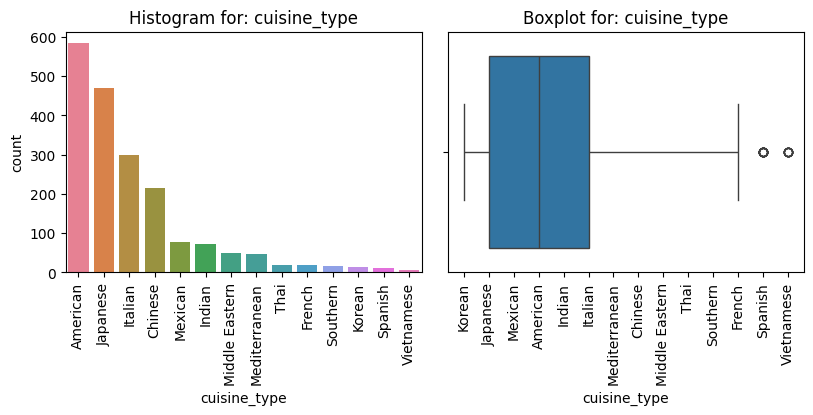

In [ ]:
# Display two plots for cuisine_type
print_dual_box_bar_plots(df, 'cuisine_type', 8, 3)


Observations:

*   American, Japanese, Italian, Chinese and Mexican are the top 5 cuisine types.
*   Few orders exist for Spanish and Vietnamese orders (outliers).

**Series: cost_of_the_order**

Each order has a cost. This will be an interesting numerical variable to later examine across other categorical values in the dataset.

For now, using univariate analysis, we can still make some basic observations about the median, range and outliers.



In [ ]:
# Repeat describe here to reference numbers alongside boxplot.
df['cost_of_the_order'].describe().T

count   1898.00
mean      16.50
std        7.48
min        4.47
25%       12.08
50%       14.14
75%       22.30
max       35.41
Name: cost_of_the_order, dtype: float64

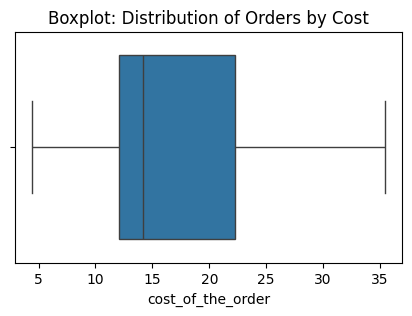

In [ ]:
#Display boxplot for the distribution of cost_of_the_order.
print_boxplot(df, 'cost_of_the_order', 5, 3, 'Boxplot: Distribution of Orders by Cost')


Observations:

*   Out of 1898 orders, half cost just over \$14.
*   The mean (average) cost of an order is about \$16.50.
*   The data is right-skewed, since the mean is higher than the median.
*   Most orders cost between approximately \$14 and \$22, although the range of order costs is high.
  *   The least expensive order was \$4.47.
  *   The most expensive order was \$35.41.

**Series: day_of_the_week**

We can apply a basic distribution for weekdays vs. weekends. Since we know that each row represents a single order, this gives us insight into demand during those time periods.

We do not have information about the specific day of week, or time of day.

In [ ]:
# Print the counts.
print(df['day_of_the_week'].value_counts().T)

# Print the counts as a percentage value, and remove the leading space while adding whitespace.
print('\n',df['day_of_the_week'].value_counts(normalize=True).T, sep='')

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

day_of_the_week
Weekend   0.71
Weekday   0.29
Name: proportion, dtype: float64


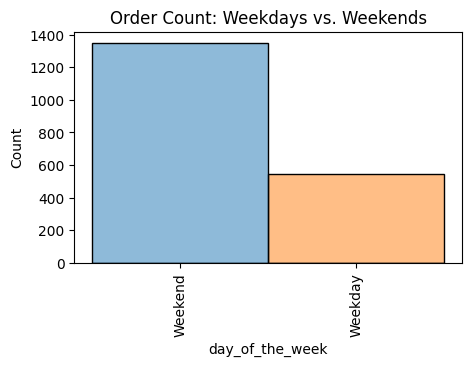

In [ ]:
# Display only the histogram for day_of_the_week, since we know we have only two unique values.
# Here, we will omit the hue from the function call, since we have only two values and do not need to visually distinguish them with colors.
print_histogram(df, 'day_of_the_week', 5, 3, 'Order Count: Weekdays vs. Weekends', 'day_of_the_week')

Observations:

*   The weekend is the most popular time to order.
  *   On weekends, 1351 orders were placed (71% of our dataset).
  *   On weekdays, that number drops to 547 orders (29% of our dataset).

* Because we have over twice as many weekend orders, our analysis will be highly biased toward data for weekends.

**Series: rating**

Similarly to day_of_the_week, we can look at ratings in the context of order rows in our dataset.

Since this is not true numerical data, it does not make sense to use a boxplot; however, a histogram will reveal the distribution of the rating as a categorical variable.

If we also convert rating to numerical, we can get more statistical information.

In [ ]:
# Repeat value counts and contributions here to reference numbers alongside boxplot.
df['rating'].value_counts().T

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [ ]:
# Use the normalize argument and transpose to show percentage breakdown by categorical value.
df['rating'].value_counts(normalize=True).T

rating
Not given   0.39
5           0.31
4           0.20
3           0.10
Name: proportion, dtype: float64

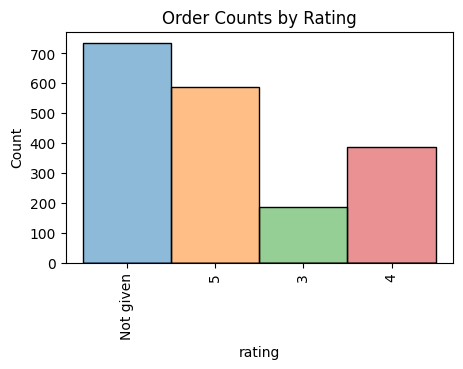

In [ ]:
# Similar to the prior chart, only a few unique ratings exist, so a histogram will work well here.
# To further distinguish ratings, we will pass in a hue column to our function.
print_histogram(df, 'rating', 5, 3, 'Order Counts by Rating', 'rating')

In [ ]:
# The previous histogram worked fine for assessing occurrences, but to make certain calculations on ratings, we need to convert ratings to a number.

# We will create a copy of our dataframe to do this, and reference it later.
df_ratings = df[df['rating'] != 'Not given'].copy()

# Convert the value to an integer
df_ratings['rating_numerical'] = df_ratings['rating'].astype(int)

# Check average rating
print('For orders that received a rating, the average rating is:',round(df_ratings['rating_numerical'].mean(),2))

For orders that received a rating, the average rating is: 4.34


Observations

*   A high number of orders did not receive a rating (736, or 39%).
*   Of the remaining orders:
  *     588 orders were rated 5 (31%).
  *     386 orders were rated 4 (20%).
  *     The remaining 188 orders were rated 3 (10%).
*   For orders that received ratings, the average rating is 4.34.


**Series: food_preparation_time**

Like ratings and customers, food_preparation_time can be reviewed in the context of an order.

Time series values are numerical and therefore a boxplot can reveal some insights. In this case, the number of unique values makes a histogram less useful, but a violin plot can help us view the entire range of values.

We can anticipate examining this numerical range of values later to find out more.

In [ ]:
# Check the ensure we have good values
print(df['food_preparation_time'].unique())

[25 23 20 28 33 21 29 34 24 30 35 32 31 27 22 26]


In [ ]:
# Repeat describe here to reference numbers alongside boxplot.
df['food_preparation_time'].describe()

count   1898.00
mean      27.37
std        4.63
min       20.00
25%       23.00
50%       27.00
75%       31.00
max       35.00
Name: food_preparation_time, dtype: float64

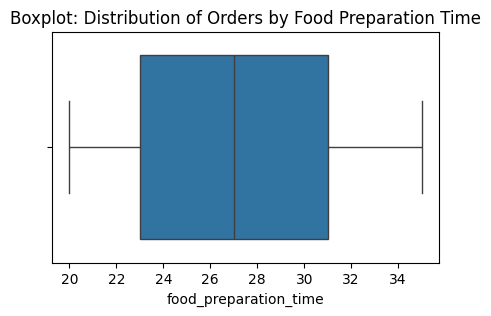

In [ ]:
# Display boxplot for the distribution of food_preparation_time.
print_boxplot(df, 'food_preparation_time', 5, 3, 'Boxplot: Distribution of Orders by Food Preparation Time')

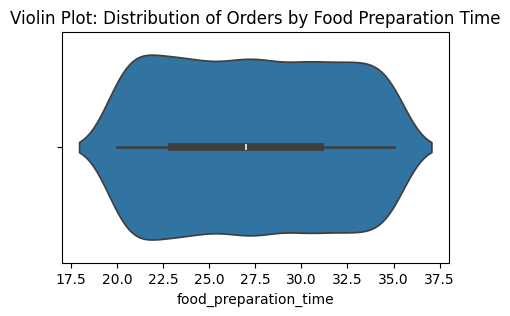

In [ ]:
# Display violin plot for the distribution of food_preparation_time.
print_violin(df, 'food_preparation_time', 5, 3, 'Violin Plot: Distribution of Orders by Food Preparation Time')

Observations:

*   Half of orders take 27 minutes to prepare.
*   The average time to prepare an order is slightly over 27 minutes.
*   The time to prepare an order  varies between 20 to 35 minutes.
*   This data has a normal, non-skewed distribution, since the mean and median are very close in value.
*   It is not distinctly bimodal since it does not exhibit notable peaks, but most values are on a plateau between about 23 and 31 minutes.

**Series: delivery_time**

Similar to food preparation time, we'll use a boxplot and violin plot to chart delivery_time values.

Because delivery time is crucial to a customer's experience, we also want to understand ranges of delivery times.

In [ ]:
# Check the ensure we have good values
print(df['delivery_time'].unique())

[20 23 28 15 24 21 30 26 22 17 25 16 29 27 18 31 32 19 33]


In [ ]:
# Repeat describe here to reference numbers alongside boxplot.
df['delivery_time'].describe()

count   1898.00
mean      24.16
std        4.97
min       15.00
25%       20.00
50%       25.00
75%       28.00
max       33.00
Name: delivery_time, dtype: float64

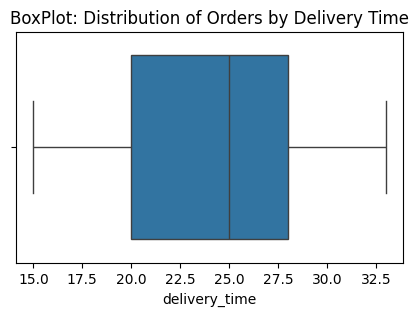

In [ ]:
#Display boxplot for the distribution of delivery_time
print_boxplot(df, 'delivery_time', 5, 3, 'BoxPlot: Distribution of Orders by Delivery Time')

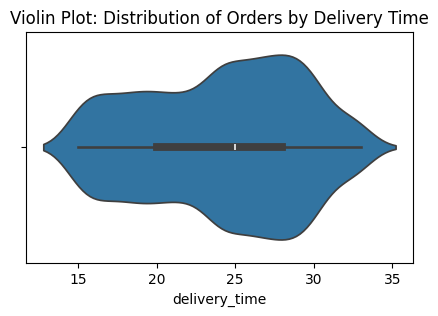

In [ ]:
# Use a violin plot to get a sense of the range and distribution.
print_violin(df, 'delivery_time', 5, 3, 'Violin Plot: Distribution of Orders by Delivery Time')

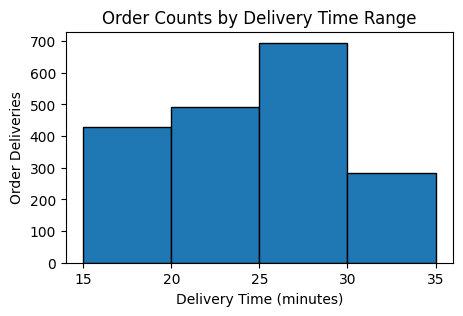

In [ ]:
# Next, determine the range of delivery times by finding min, max.
min_delivery_time = df['delivery_time'].min()
max_delivery_time = df['delivery_time'].max()

# Next, since we have many values, let's bucket delivery times in 5-minute increments using the Numpy method arange().
delivery_bins = np.arange(min_delivery_time, max_delivery_time + 6, 5)

# Create a histogram of delivery time using the defined bins.
plt.figure(figsize=(5, 3))
plt.hist(df['delivery_time'], bins=delivery_bins, edgecolor='black')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Order Deliveries')
plt.title('Order Counts by Delivery Time Range')
plt.xticks(delivery_bins)
plt.show()


Observations:

*   Half of orders take 25 minutes to deliver.
*   The average time to deliver an order is just over 24 minutes.
*   The time to deliver an order ranges from 15 to 35 minutes.
*   Delivery Time is not a very pronounced bimodal, but has many values that fall between 25 and 30 minutes.
*   The delivery time data has a slight left-skewed distribution, since the mean is slightly under the median.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

To answer this question, we need to examine order_id and restaurant_name.

Pivot tables will also be useful for summing the values.

In [ ]:
# Note: We are still using the dataframe with "Not given" ratings, since we aren't analyze ratings here.

# Here, we are using a sorted pivot table to aggregrate order counts by restaurant. Pivots are useful for showing totals and individual values and can be used in some charts.
pivot_restaurant_orders = pd.pivot_table(df
                                         ,values='order_id'       # the values to count
                                         ,index='restaurant_name' # the grouping to use
                                         ,aggfunc='count'         # the type of aggregation to use
                                         ,margins=True            # adds a new row to store total, with next line
                                         ,margins_name='Total').sort_values(by='order_id', ascending=False)

# Since it would be interesting to also see the numbers as a percentage in our pivot table, we'll add a new column for this value as well.
pivot_restaurant_orders['percent_contribution'] = (pivot_restaurant_orders['order_id'] / pivot_restaurant_orders.loc['Total', 'order_id']) * 100

# We need to show the top 6, since Total is the first value and this is a zero-based.
display(pivot_restaurant_orders.head(6))

,order_id,percent_contribution
restaurant_name,,
Total,1898,100.00
Shake Shack,219,11.54
The Meatball Shop,132,6.95
Blue Ribbon Sushi,119,6.27
Blue Ribbon Fried Chicken,96,5.06
Parm,68,3.58


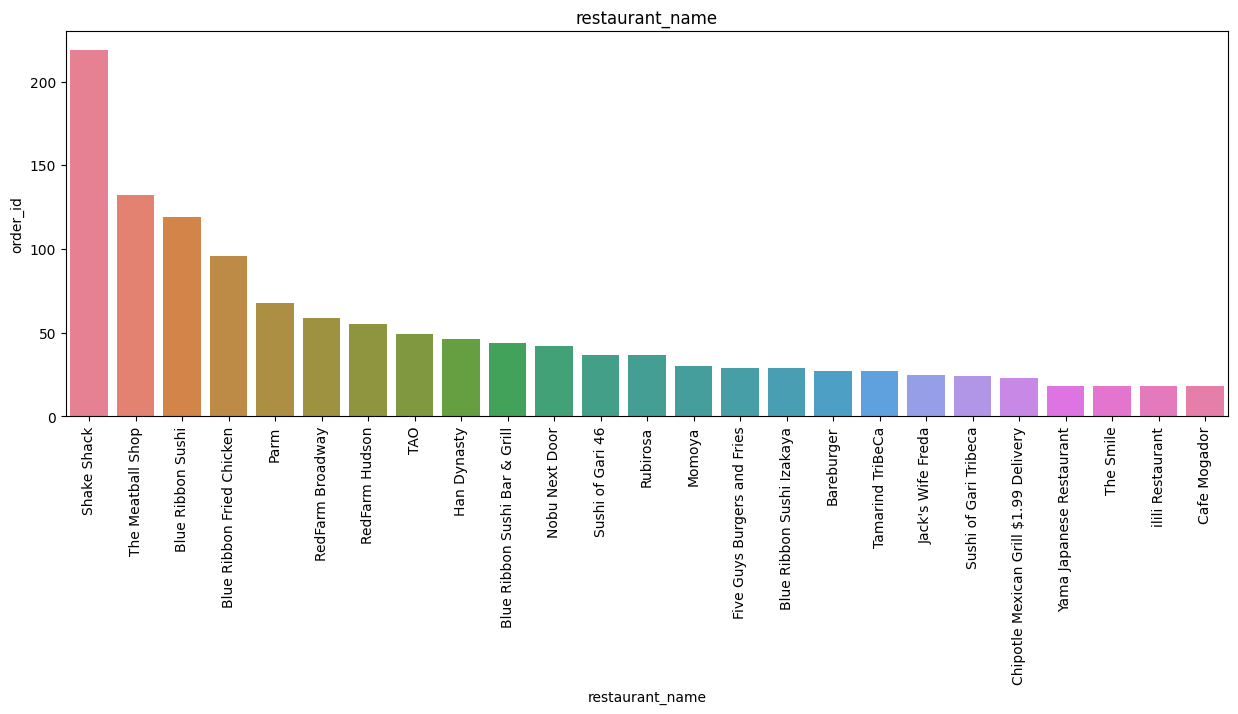

In [ ]:
# A simple barplot can also be used to show the approximate distribution of orders across the top restaurants.
# Because we're using our sorted pivot table, our bars will be ordered by count in descending order.
# For this exercise, we'll look only at the top 25.
print_barplot(pivot_restaurant_orders[pivot_restaurant_orders.index != 'Total'].head(25), 'restaurant_name', 'order_id', 15, 5, 'restaurant_name', 10)

In [ ]:
# We can use our pivot table to also identify how many restaurants had only one order by using a filter.
pivot_restaurant_single_order = pivot_restaurant_orders[pivot_restaurant_orders['order_id'] == 1]
print(pivot_restaurant_single_order.shape[0], 'restaurants out of', pivot_restaurant_orders['order_id'].count(),'have only a single order.')

50 restaurants out of 179 have only a single order.


#### Observations:

The top 5 restaurants with the most orders are listed below and account for over a quarter of all orders.

*   Shake Shack: 219 orders (11.53%)
*   The Meatball Shop: 132 orders (6.95%)
*   Blue Ribbon Sushi: 119 orders (6.27%)
*   Blue Ribbon Fried Chicken: 96 orders (5.06%)
*   Parm: 68 orders (3.58%)


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

To answer this question, we will use a simple countplot, along with a plot setting to break out weekends vs. weekdays.

From our earlier steps, we already know that order volume is significantly higher on the weekends.

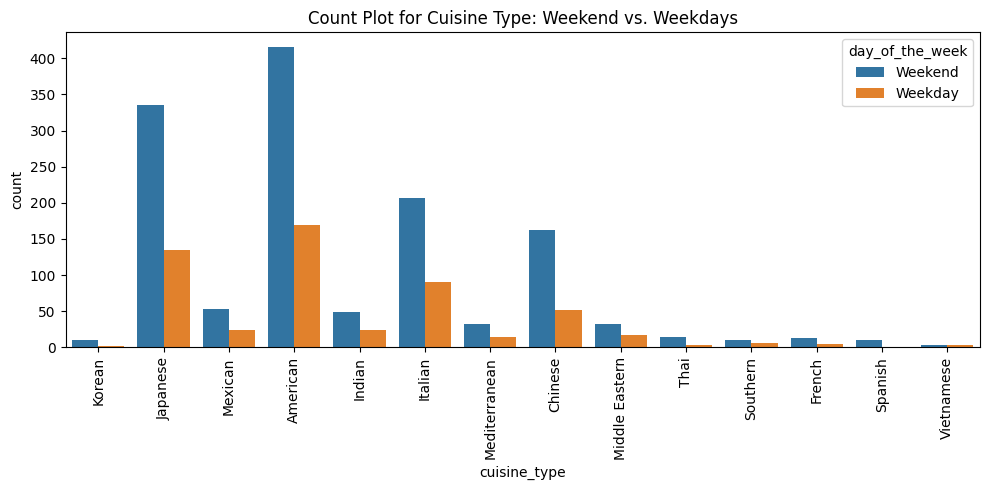

In [ ]:
# Let's us a countplot to compare the data during weekdays and weekends instead of a pivot table, since we don't yet the distribution.
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week');
title1 = 'Count Plot for Cuisine Type: Weekend vs. Weekdays'
plt.title(title1)
plt.xticks(rotation=90)
plt.tight_layout()


In [ ]:
# Create a pivot table to see the exact counts by day of week and cuisine.
pivot_dayofweek_cuisinetype_orders = pd.pivot_table(df,
                                                    index='day_of_the_week', # parent group column
                                                    columns='cuisine_type',  # child group column
                                                    values='order_id',       # the column to count
                                                    aggfunc='count')         # the type of aggregation to use

display(pivot_dayofweek_cuisinetype_orders)



cuisine_type,American,Chinese,French,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Middle Eastern,Southern,Spanish,Thai,Vietnamese
day_of_the_week,,,,,,,,,,,,,,
Weekday,169,52,5,24,91,135,2,14,24,17,6,1,4,3
Weekend,415,163,13,49,207,335,11,32,53,32,11,11,15,4


#### Observations:

*   On the weekends, the most popular cuisines are:
  *   American (415 orders)
  *   Japanese (335 orders)
  *   Italian (207 orders)
*   The same cuisine trend persists on weekdays, even though our dataset has many fewer weekday orders for each of the three cuisines.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#First, let's find all orders costing more than $20, using a filtered copy of the dataset.
df_over_20 = df[df['cost_of_the_order'] > 20]

# Now, let's count the orders in the datasets.
count_of_orders = len(df)
count_of_orders_over_20 = len(df_over_20)

#Then, let's see how the count in our over 20 dataset contributes to the entire set of orders.
print('count_of_orders:', count_of_orders)
print('count_of_orders_over_20:', count_of_orders_over_20)
print('This accounts for ',f'{(count_of_orders_over_20/count_of_orders) * 100: .2f}%', 'of all orders.')

count_of_orders: 1898
count_of_orders_over_20: 555
This accounts for   29.24% of all orders.


#### Observations:

*   Our data includes 1898 orders in total.
*   Of these, 555 orders cost more than $20.
*   This represents 29.24% of all orders.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Earlier, we confirmed we are not missing values, so we can use the mean method to find this value.
print('The average (mean) delivery time for an order is:', round(df['delivery_time'].mean(),2))


The average (mean) delivery time for an order is: 24.16


#### Observations:
*  The mean for order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Since we already know each row is 1 order, the easiest way to get the counts of each customer_id is to use the value_counts method.
# Alternatively, we could copy the dataframe and sort it, but that's not necessary since we aren't summing any values by customer, only counting orders.

# Use the value counts method along with head() to show the top 3.
print('The top 3 customers are listed below, along with their order frequencies:\n', df['customer_id'].value_counts().head(3), '\n')

The top 3 customers are listed below, along with their order frequencies:
 customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64 



#### Observations:

The top 3 customers with the most orders are:
*   Customer 52832: 13 orders
*   Customer 47440:	10 orders
*   Customer 83287:	9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Now, let's examine some relationships between variables of interest, so we can gain insights and make recommendations to the business.

*  Weekends vs. Weekends
*  Ratings by Food Preparation and Delivery Time
*  Ratings by Restaurant
*  Ratings by Cuisine Type
*  Ratings by Order Cost
*  Order Cost by Cuisine Type
*  Times by Cuisine Type
*  Revenue by Restaurant
*  Revenue by Cuisine
*  Customer Loyalty

####Weekdays vs. Weekends

We already know our data is heavily weighted toward weekend orders.

Let's see if we can detect anything that differs significantly between orders placed on the weekends vs. weekdays.

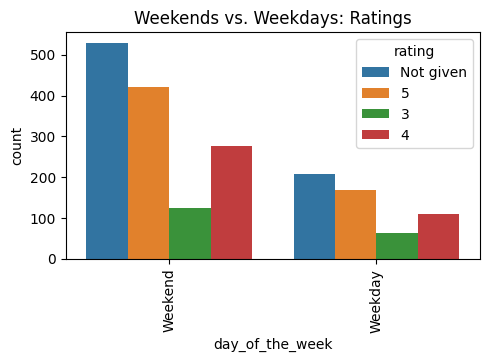

In [ ]:
# Note: First, we will use the original dataframe since we are simply counting categorical values vs. running statistical methods such as mean().

# Show the rating category counts by weekdays vs. weekend.
plt.figure(figsize=(5, 3))
sns.countplot(df, x='day_of_the_week', hue='rating')
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Weekends vs. Weekdays: Ratings')
plt.show()

# OBSERVATION
# *  More ratings are given on the weekends vs. weekdays.
# *  Distribution is consistent in both time periods.


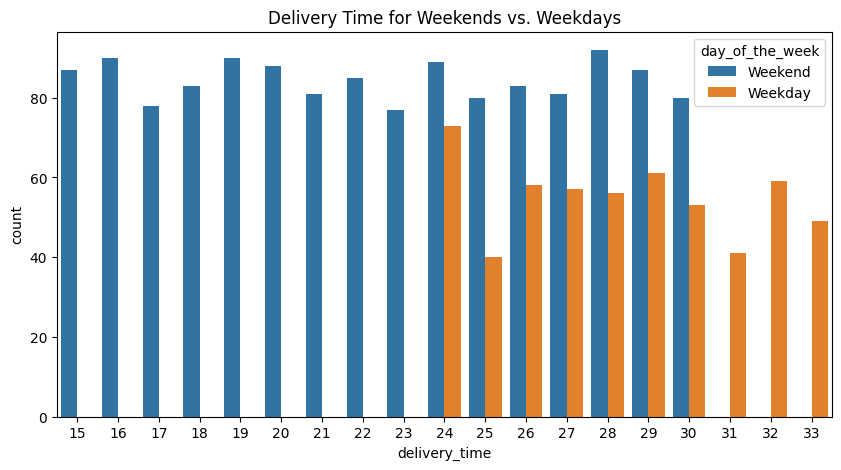

In [ ]:
# Look at delivery Times by weekend vs. weekday
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='delivery_time', hue='day_of_the_week')
plt.title('Delivery Time for Weekends vs. Weekdays')
plt.show()

# OBSERVATION
# * Weekdays have longer delivery times.
# * The number of orders is similar for most delivery times during the weekends.

In [ ]:
# Count orders by weekends and weekdays
order_count   = df['order_id'].count()
weekend_count = df['order_id'][df['day_of_the_week'] == 'Weekend'].count()
weekday_count = df['order_id'][df['day_of_the_week'] == 'Weekday'].count()

print('Weekends:', weekend_count, '(',round(weekend_count/order_count * 100, 2), '% of orders)')
print('Weekends:', weekday_count, '(',round(weekday_count/order_count * 100, 2), '% of orders)')

Weekends: 1351 ( 71.18 % of orders)
Weekends: 547 ( 28.82 % of orders)


####Ratings by Food Preparation and Delivery Time

How do ratings differ when we introduce time-based variables?

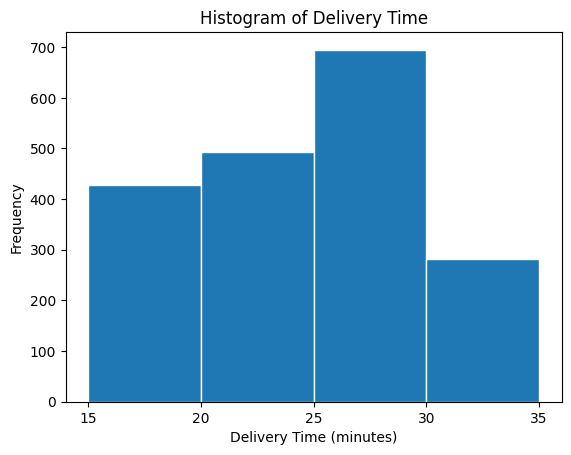

In [ ]:
# Look at ratings by delivery time bins

# Determine the range of delivery time
min_delivery_time = df['delivery_time'].min()
max_delivery_time = df['delivery_time'].max()

# Define bins for delivery time in 5-minute increments using np.arange
delivery_bins = np.arange(min_delivery_time, max_delivery_time + 6, 5)

# Plot delivery time buckets and ratings using the defined bins
sns.countplot()
plt.hist(df['delivery_time'], bins=delivery_bins, edgecolor='white')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Delivery Time')

# Use the bins as ticks
plt.xticks(delivery_bins)
plt.show()


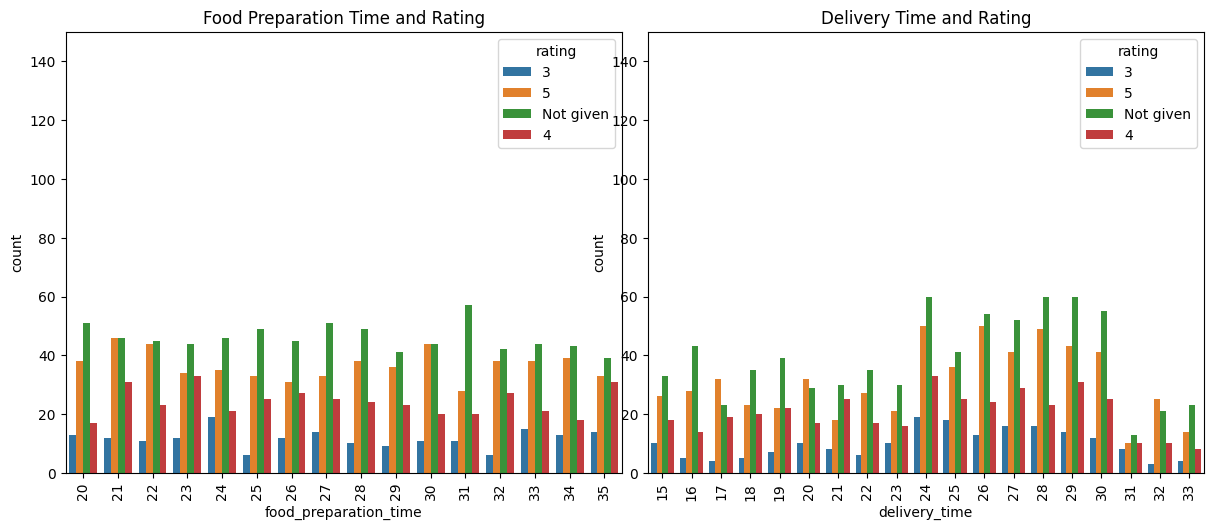

In [ ]:
# NOTE: Here, for each part of this analysis, we need to decide whether to use the categorical or numerical ratings dataset

# Look at ratings by food prep and delivery times

# set figure size
plt.figure(figsize=(12, 5))

# define first plot
plt.subplot(1, 2, 1)
title1 = 'Food Preparation Time and Rating'
plt.tight_layout()
plt.xticks(rotation=90)

# set the Y limits evenly to compare both charts
plt.ylim(0, 150)
sns.countplot(data=df, x='food_preparation_time', hue='rating')
plt.title(title1)
plt.xticks(rotation=90)

# define second plot
plt.subplot(1, 2, 2)
title2 = 'Delivery Time and Rating'
sns.countplot(data=df, x='delivery_time', hue='rating')
plt.ylim(0, 150)
plt.title(title2)
plt.xticks(rotation=90)
plt.show()


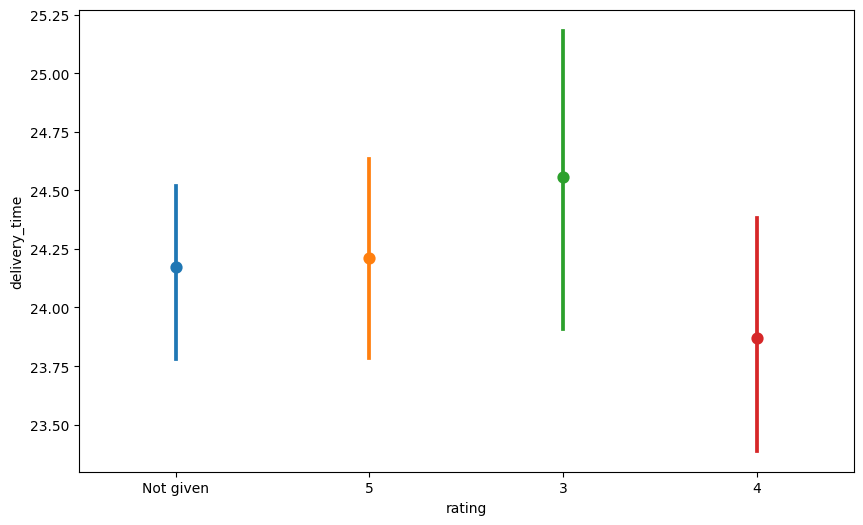

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='rating', y='delivery_time', hue='rating')
plt.show()

# OBSERVATIONS
# *   Orders rated a 3 generally took longer to deliver.
# *   Orders rated a 4 generally took the least time to deliver.
# *   There were more 5s given for orders delivering between 24 and 30 minutes.

####Rating by Restaurant

In [ ]:
# NOTE: Here, we want to reference the numerical values for ratings that we created during our univariate analysis so we can calculate averages by restaurant.

# Group by restaurant and sort by the highest ratings
df_order_time_grouped_restaurant = df_ratings.groupby('restaurant_name')[['rating_numerical']].mean().sort_values(by='rating_numerical', ascending=False)
df_order_time_grouped_restaurant

,rating_numerical
restaurant_name,
'wichcraft,5.00
Ravagh Persian Grill,5.00
Chola Eclectic Indian Cuisine,5.00
Chote Nawab,5.00
Junoon,5.00
...,...
Woorijip,3.00
Byblos Restaurant,3.00
Pepe Giallo,3.00


In [ ]:
# Show the restaurants with the most 5s

# Calculate the mean rating for each restaurant
mean_ratings = df_order_time_grouped_restaurant.groupby('restaurant_name')['rating_numerical'].mean()

# Filter restaurants with a mean rating of 5
highly_rated_restaurants = mean_ratings[mean_ratings == 5]

# Print the highly rated restaurants
print('Restaurants with average 5 ratings:', highly_rated_restaurants.count())
print(highly_rated_restaurants)


Restaurants with average 5 ratings: 47
restaurant_name
'wichcraft                      5.00
67 Burger                       5.00
Anjappar Chettinad              5.00
Asuka Sushi                     5.00
Balade                          5.00
Bhatti Indian Grill             5.00
Big Daddy's                     5.00
Bukhara Grill                   5.00
Cafe de La Esquina              5.00
Carmine's                       5.00
Chola Eclectic Indian Cuisine   5.00
Chote Nawab                     5.00
Cipriani Le Specialita          5.00
DespaÌ±a                        5.00
Dig Inn Seasonal Market         5.00
Donburi-ya                      5.00
Dos Caminos                     5.00
Dos Caminos Soho                5.00
El Parador Cafe                 5.00
Galli Restaurant                5.00
Grand Sichuan International     5.00
Haru Gramercy Park              5.00
Hot Kitchen                     5.00
Hunan Manor                     5.00
Junoon                          5.00
Kambi Ramen House   

In [ ]:
# Show the restaurants with 3 ratings

# Calculate the mean rating for each restaurant
mean_ratings = df_order_time_grouped_restaurant.groupby('restaurant_name')['rating_numerical'].mean()

# Filter restaurants with a mean rating of 5
low_rated_restaurants = mean_ratings[mean_ratings == 3]

# Print the highly rated restaurants
print('Restaurants with average 3 ratings:', low_rated_restaurants.count())
print(low_rated_restaurants)


Restaurants with average 3 ratings: 8
restaurant_name
Byblos Restaurant          3.00
Haveli Indian Restaurant   3.00
Nha Trang One              3.00
Pepe Giallo                3.00
Sarabeth's West            3.00
Sushi Choshi               3.00
Woorijip                   3.00
brgr                       3.00
Name: rating_numerical, dtype: float64


####Rating by Cuisine Type
Let's see if there is a tendency for rating across cuisines.

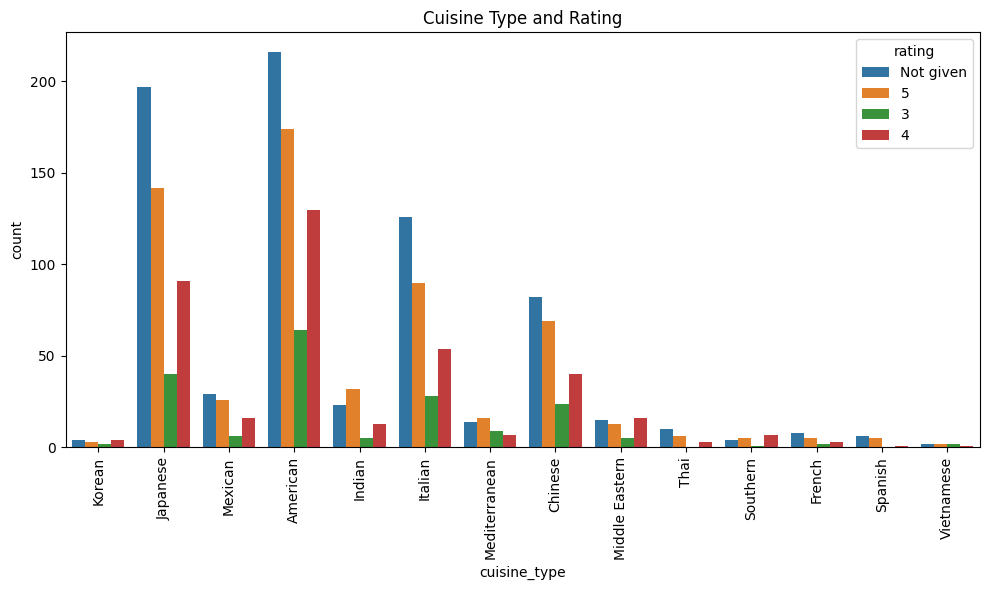

In [ ]:
# View ratings by cuisine type, using our categorical rating
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cuisine_type', hue='rating')
plt.title('Cuisine Type and Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(rotation=90)
# Show the plot
plt.show()


####Rating by Order Cost

Let's examine the data to see if there is a price-quality heuristic / perceived value based on the cost of the order and the level of rating.

In [ ]:
# Check the data to validate order cost - rating.

# First create a copy since we need to preserve the original dataframe but want to slice it up.
df_ratings_cost = df_ratings.copy()

# We want to bucket the cost of the order since we have many unique values
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

df_ratings_cost['cost_bin'] = pd.cut(df_ratings['cost_of_the_order'], bins)

# Now, show the average of each bin
df_ratings_cost.groupby(['rating', 'cost_of_the_order'])[['rating_numerical']].mean()
print('The average order cost by rating is:')
df_pivot_ratings = pd.pivot_table(df_ratings_cost, values='cost_of_the_order', index='cost_bin', columns='rating_numerical', aggfunc='mean')

# Reset the index and adjust the values to remove unsightly bracket and parentheses
df_pivot_ratings.reset_index(inplace=True)
df_pivot_ratings['cost_bin'] = df_pivot_ratings['cost_bin'].astype(str)
df_pivot_ratings['cost_bin'] = df_pivot_ratings['cost_bin'].str.replace('(', '').str.replace(']', '').str.replace(', ', '-')

display(df_pivot_ratings)

# OBSERVATIONS:
# * Most ratings are provided when meals cost between approximately $9 and $16
# * The most ratings of 3 occured around $14
# * The most ratings of 4 occured around $11 to $16
# * The most ratings of 5 occured around $14

The average order cost by rating is:


rating_numerical,cost_bin,3,4,5
0,0-5,4.75,4.82,4.72
1,5-10,7.34,7.54,7.94
2,10-15,12.91,12.70,12.81
3,15-20,16.48,17.15,17.00
4,20-25,22.55,23.10,23.14
5,25-30,27.56,28.08,28.29
6,30-35,32.40,32.20,32.35
7,35-40,NaN,35.41,NaN


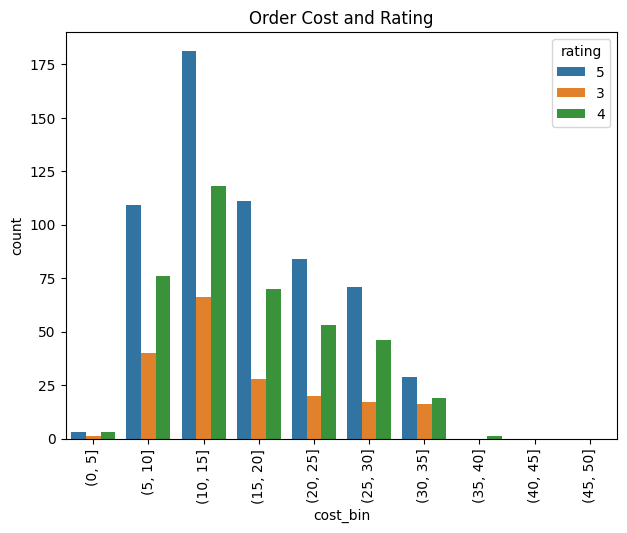

In [ ]:
# Show the binned data on a plot
sns.countplot(data=df_ratings_cost, x='cost_bin', hue='rating')
title = 'Order Cost and Rating'
plt.tight_layout()
plt.xticks(rotation=90)

# Set the title
plt.title(title)

# Show the plot
plt.show()

# OBSERVATION
# * Most 5s were given for orders costing between $10 and $15


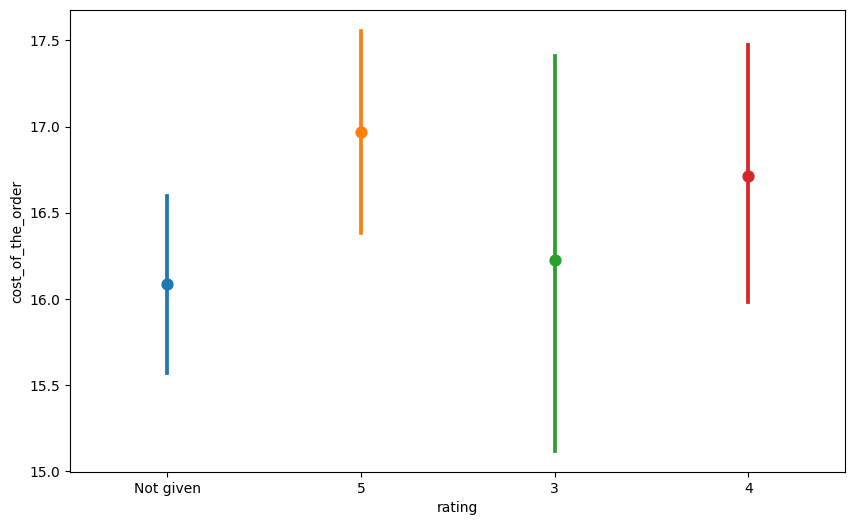

In [ ]:
# Create a plot to see if ratings vary by order cost
# Here, we can use the categorical rating.

plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='rating', y='cost_of_the_order', hue='rating')
plt.show()

# OBSERVATION
# * Most unrated orders were cheaper than rated orders, and higher ratings correlate to slightly higher prices.

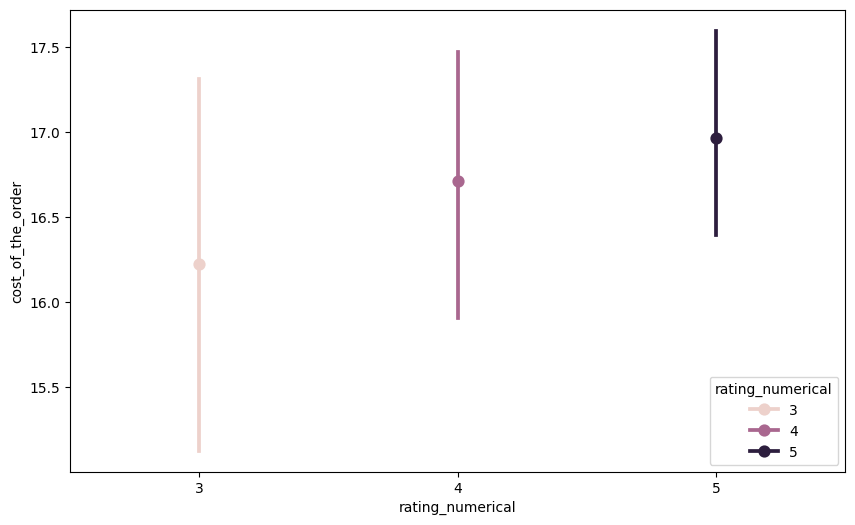

In [ ]:
# Repeat but with numerical rating.

plt.figure(figsize=(10, 6))
sns.pointplot(data=df_ratings, x='rating_numerical', y='cost_of_the_order', hue='rating_numerical')
plt.show()

# OBSERVATION
# * There appears to be a slight correlation with higher prices and higher ratings, but the cost difference makes this negligible.

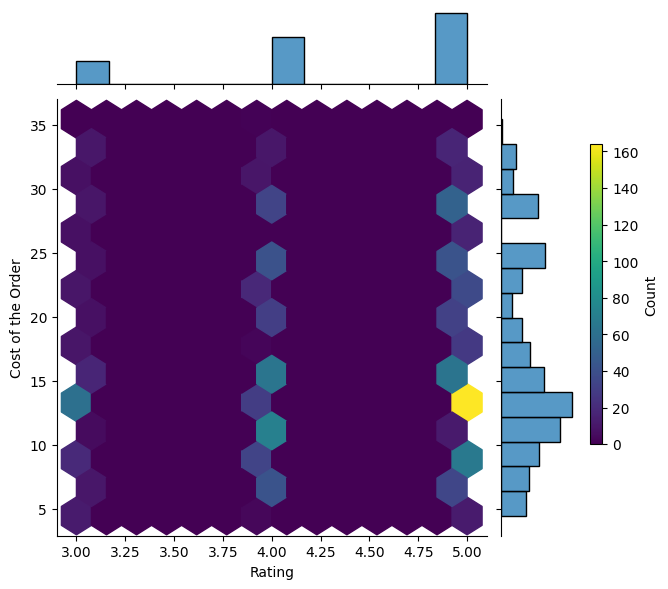

In [ ]:
# Create a jointplot with and use hex coloring to double check if there's a correlation between cost and rating
joint_plot = sns.jointplot(data=df_ratings, x='rating_numerical', y='cost_of_the_order', kind="hex", cmap='viridis')
joint_plot.set_axis_labels('Rating', 'Cost of the Order')

# Set up .25 ticks to make the plot square, else it's really tall and skinny
cbar_ax = joint_plot.fig.add_axes([1, 0.25, 0.02, .5])
plt.colorbar(cax=cbar_ax, label='Count')
plt.show()

# OBSERVATION:
# * Most 5 ratings are given for orders between approximately $14 to $16.
# * Most 4 ratings are given for orders between approximately $12 to $17.
# * Most 3 ratings are given for orders between approximately $14.


####Rating by Delivery Time

Let's examine the data to see if there is a relationship between the delivery time and the level of rating.

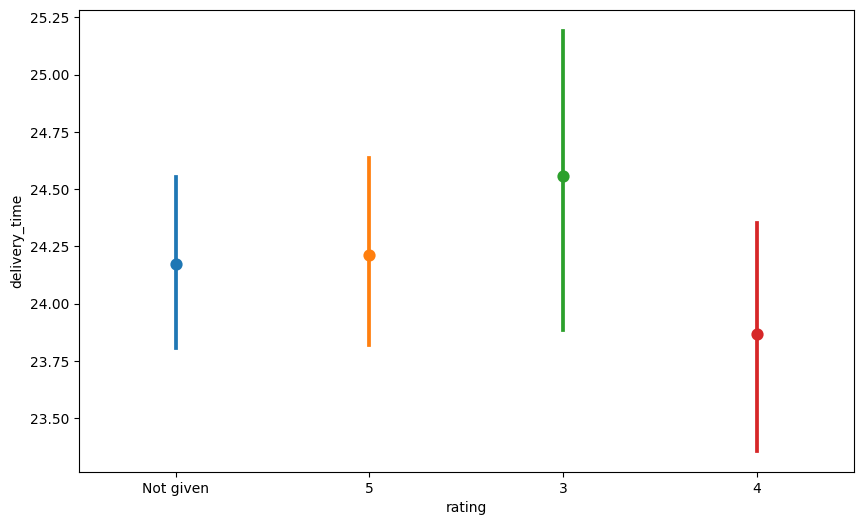

In [ ]:
# Create a plot to see if ratings vary by delivery times
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='rating', y='delivery_time', hue='rating')
plt.show()

# OBSERVATION
# * Longer delivery time orders received lower ratings.
# * Orders not rated and orders rated 5 were about the same counts.

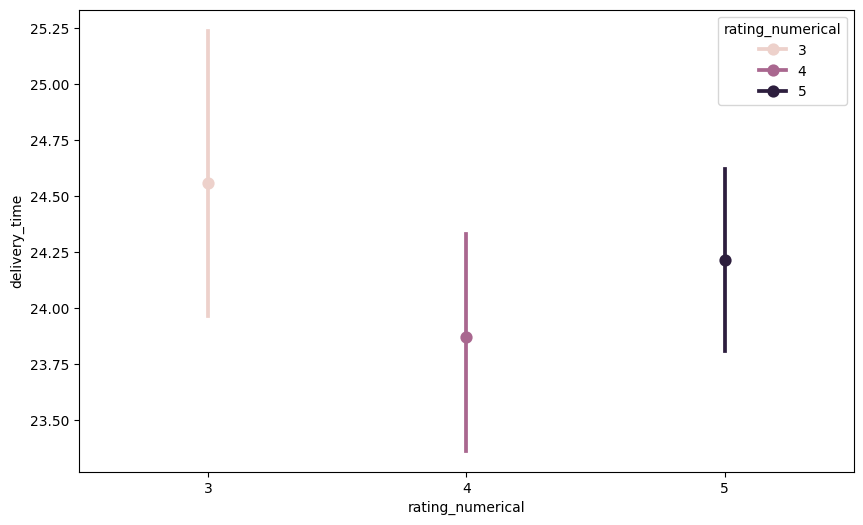

In [ ]:
# Repeat but only with rated orders
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_ratings, x='rating_numerical', y='delivery_time', hue='rating_numerical')
plt.show()


In [ ]:
# Check the data to validate delivery time - rating.

# First create a copy since we need to preserve the original dataframe but want to slice it up.
df_ratings_time = df_ratings.copy()

# We want to bucket the cost of the order since we have many unique values
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

df_ratings_time['delivery_bin'] = pd.cut(df_ratings['cost_of_the_order'], bins)

# Now, show the average of each bin
df_ratings_time.groupby(['rating', 'cost_of_the_order'])[['rating_numerical']].mean()
print('The average delivery time by rating is:')
df_pivot_ratings_time = pd.pivot_table(df_ratings_time, values='cost_of_the_order', index='delivery_bin', columns='rating_numerical', aggfunc='mean')

# Reset the index and adjust the values
df_pivot_ratings_time.reset_index(inplace=True)
df_pivot_ratings_time['delivery_bin'] = df_pivot_ratings_time['delivery_bin'].astype(str)
df_pivot_ratings_time['delivery_bin'] = df_pivot_ratings_time['delivery_bin'].str.replace('(', '').str.replace(']', '').str.replace(', ', '-')

display(df_pivot_ratings_time)

# OBSERVATIONS:
# * Most ratings are provided when meals cost between approximately $9 and $16
# * The most ratings of 3 occured around $14
# * The most ratings of 4 occured around $11 to $16
# * The most ratings of 5 occured around $14

The average delivery time by rating is:


rating_numerical,delivery_bin,3,4,5
0,0-5,4.75,4.82,4.72
1,5-10,7.34,7.54,7.94
2,10-15,12.91,12.70,12.81
3,15-20,16.48,17.15,17.00
4,20-25,22.55,23.10,23.14
5,25-30,27.56,28.08,28.29
6,30-35,32.40,32.20,32.35
7,35-40,NaN,35.41,NaN


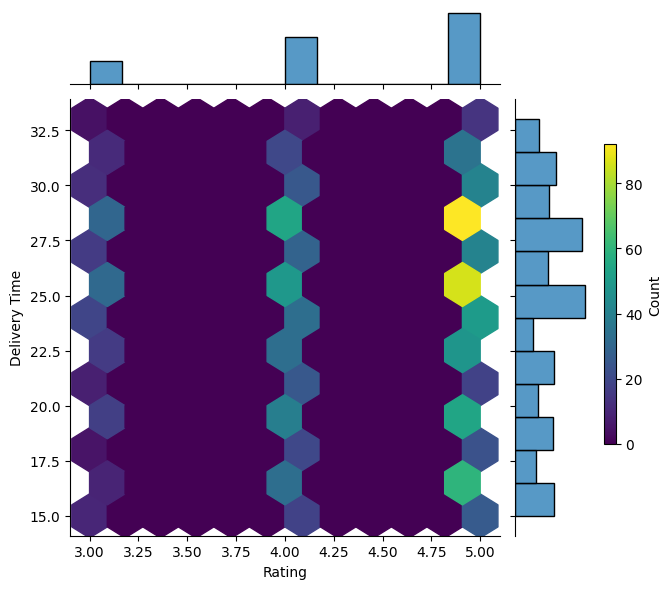

In [ ]:
# Create a jointplot with and use hex coloring to double check if there's a correlation between delivery time and rating
joint_plot = sns.jointplot(data=df_ratings, x='rating_numerical', y='delivery_time', kind="hex", cmap='viridis')
joint_plot.set_axis_labels('Rating', 'Delivery Time')

# Set up .25 ticks to make the plot square, else it's really tall and skinny
cbar_ax = joint_plot.fig.add_axes([1, 0.25, 0.02, .5])
plt.colorbar(cax=cbar_ax, label='Count')
plt.show()

# OBSERVATION:
# * Most 5 ratings are given for orders between approximately 25 and 30 minutes but occur during all timeframes consistently.
# * Most 4 ratings are given for 25 to 30 minutes.
# * Most 3 ratings are given for 25 to 30 minutes.


####   Order Cost by Cuisine Type

We will examine the relationship between the cost of the order, and the cuisine type.

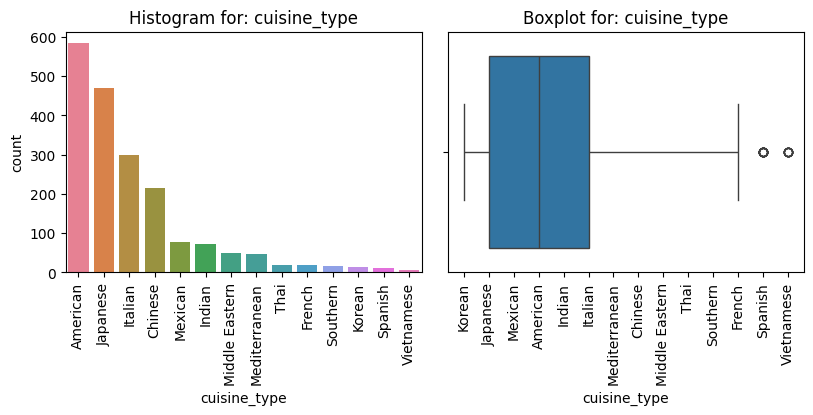

In [ ]:
# First, plot order count by cuisine type
print_dual_box_bar_plots(df, 'cuisine_type', 8, 3)

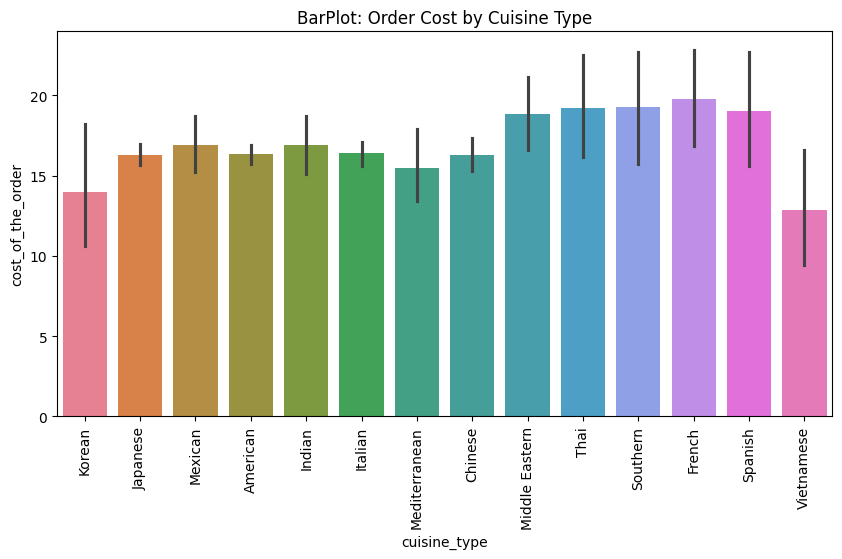

In [ ]:
# Examine order Cost by Cuisine
print_barplot(df, 'cuisine_type', 'cost_of_the_order', 10, 5, 'BarPlot: Order Cost by Cuisine Type', 'cuisine_type');

# OBSERVATIONS
# *   American and Japanese order costs are within a small range of about $16
# *   Thai, Korean, Southern, French, Spanish and Vietnamese have a wider order cost
# *   Vietnamese has the lowest order cost, and also the lowest order volume

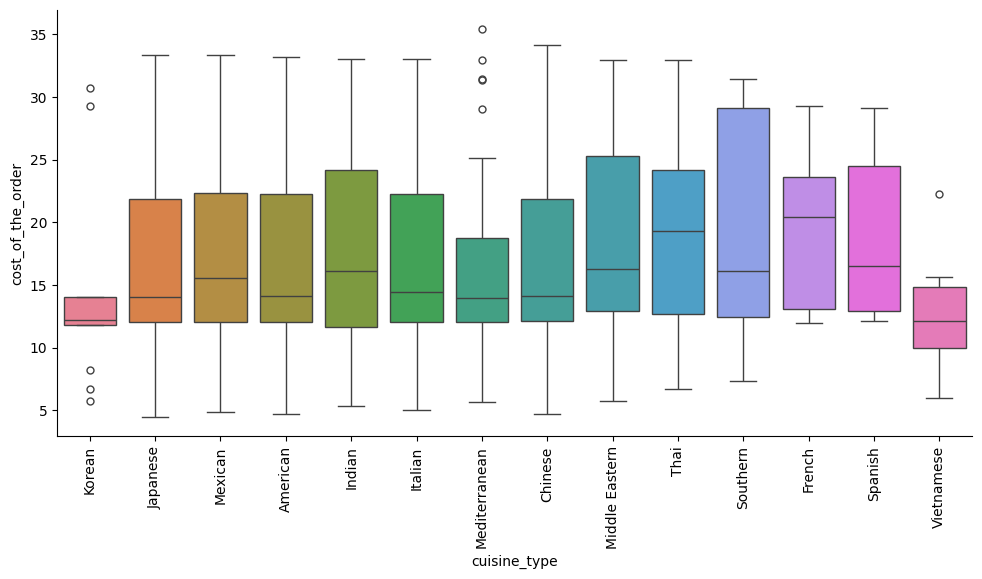

In [ ]:
# Examine order cost data by cuisine
catplot = sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', kind='box', height=5, aspect=2);
catplot.set_xticklabels(rotation=90)
plt.show()

# OBSERVATIONS
# *   The order prices vary widely for Korean (very high, very low outliers) and Mediterraean and Vietnamese (high outliers)


####Times by Cuisine Type

Let's examine order times by cuisine. We will use the combined time first, and then look at individual times if we need to know more.


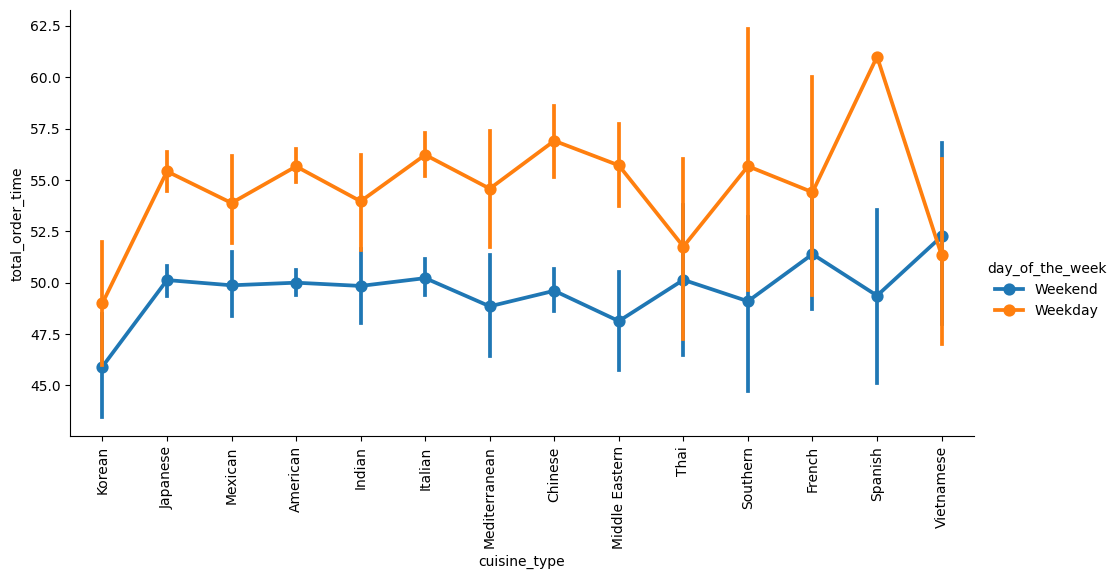

In [ ]:
# Let's look at the total time it takes for a customer to receive an order on weekends vs. weekdays

# We need to know the total time first, so let's add it
df['total_order_time'] = df['food_preparation_time'] + df['delivery_time']

# Apparently with catplots, it's really a subplot and you have to rotate labels a different way
catplot = sns.catplot(data=df, x='cuisine_type', y='total_order_time', hue='day_of_the_week', kind='point', height=5, aspect=2);
catplot.set_xticklabels(rotation=90)
plt.show()

# OBSERVATIONS:
# *    American, Chinese and Italian have the most consistency (smallest delivery windows) for both weekends and weekdays.
# *    The ranges of times are tighter/more consistent on the weekends for most cuisines.
# *    All cuisines except Vietnamese take longer from order to delivery on weekdays vs. weekends.
# *    Southern, French, Spanish all have high weekend delivery times
# *    Spanish takes the longest on the weekend


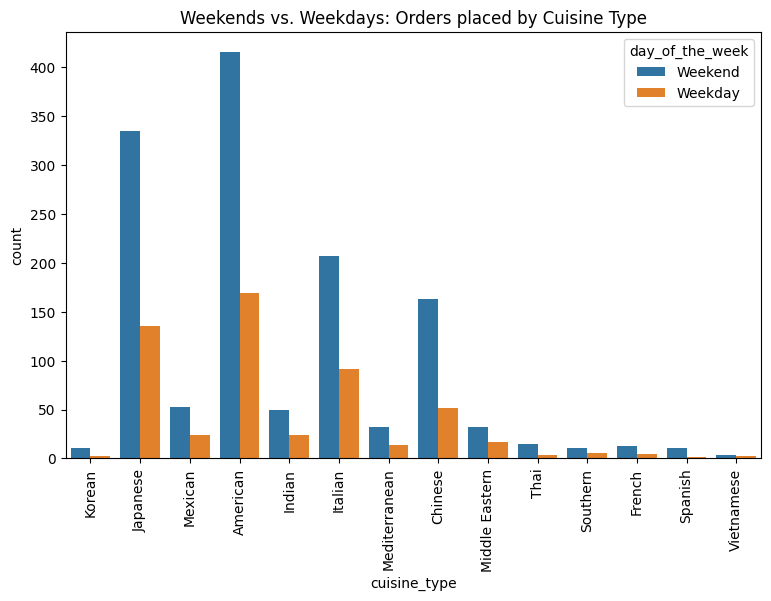

In [ ]:
# Now that we can see there is a difference in weekends and weekdays by cuisine, let's also count the number of orders by cuisine for weekday vs. weekend.
plt.figure(figsize=(8, 5))
sns.countplot(df, x='cuisine_type', hue='day_of_the_week');
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Weekends vs. Weekdays: Orders placed by Cuisine Type')
plt.show()

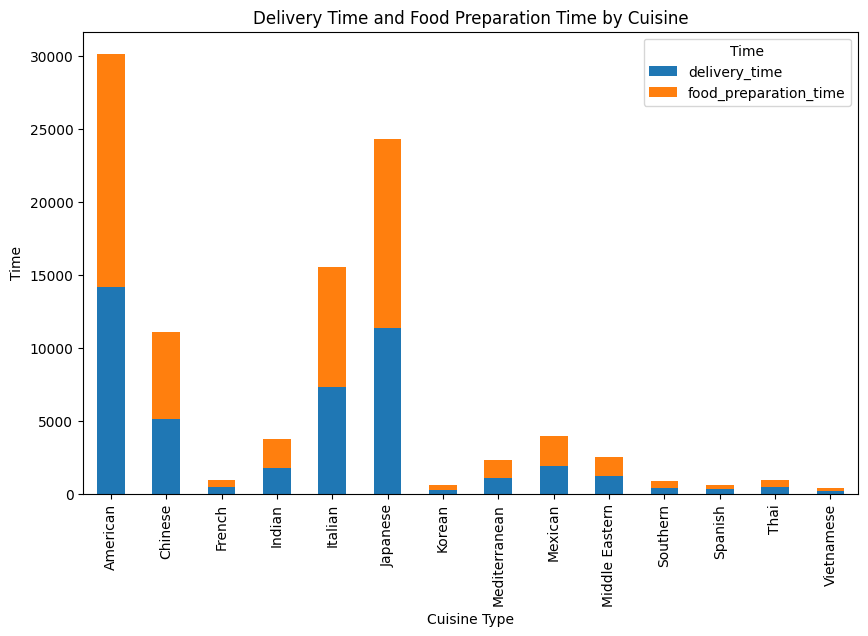

In [ ]:
# To make it easier to see on one chart, let's create a dataframe that has separate rows per order for delivery and order prep times
df_delivery_time = df[['order_id', 'delivery_time', 'cuisine_type', 'day_of_the_week']]
df_foodprep_time = df[['order_id', 'food_preparation_time', 'cuisine_type', 'day_of_the_week']]

# Make the new dataframe
df_order_time = pd.concat([df_delivery_time, df_foodprep_time], axis=0).sort_values(by='order_id', ascending=True).reindex()

# replace the NaNs with zero values
df_order_time['delivery_time'].fillna(0, inplace=True)
df_order_time['food_preparation_time'].fillna(0, inplace=True)

# group by cuisine and plot
df_order_time_grouped_cuisine = df_order_time.groupby('cuisine_type')[['delivery_time', 'food_preparation_time']].sum()

# Plot stacked bar chart
df_order_time_grouped_cuisine.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Delivery Time and Food Preparation Time by Cuisine')
plt.xlabel('Cuisine Type')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.legend(title='Time')
plt.show()

# OBSERVATIONS
# *  For each cuisine, it takes about the same amount of time to prepare an order as it does to deliver the order
# *  American, Japanese and Italian have the longest prep and delivery times. These are also the most popular cuisines, and likely busier restaurants
# *  While Southern cuisine orders have one of the longest delivery times, order volume is small, perhaps because New Yorkers do not frequent Southern restaurants as often.

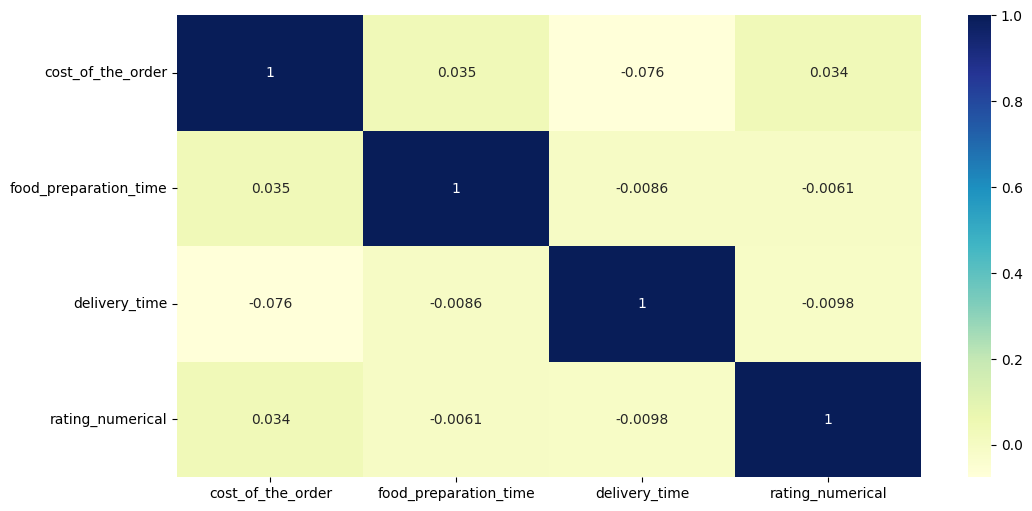

In [ ]:
# See if we can find any correlations, although there are not many numerical variables to check
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating_numerical']
plt.figure(figsize=(12, 6))
sns.heatmap(df_ratings[col_list].corr(), annot=True, cmap='YlGnBu')
plt.show()

# OBSERVATIONS
# * For rated orders, no strong correlations appear to exist.

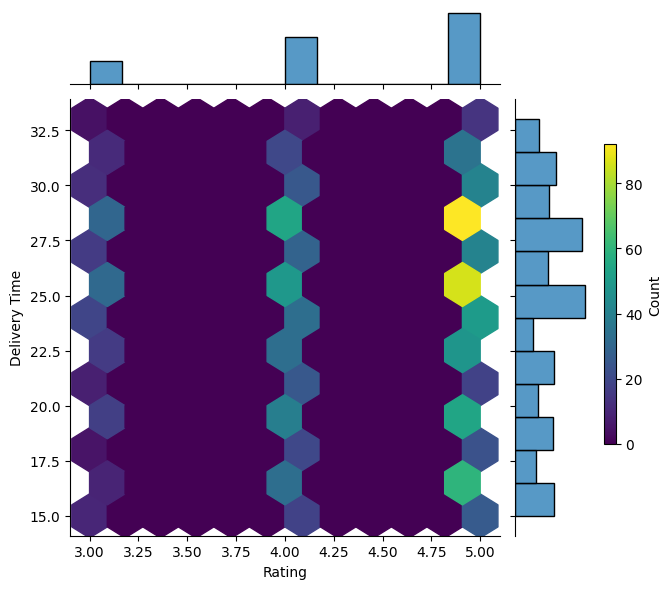

In [ ]:
# Create a jointplot with and use hex coloring to see if there's a correlation
joint_plot = sns.jointplot(data=df_ratings, x='rating_numerical', y='delivery_time', kind="hex", cmap='viridis')
joint_plot.set_axis_labels('Rating', 'Delivery Time')
cbar_ax = joint_plot.fig.add_axes([1, 0.25, 0.02, .5])
plt.colorbar(cax=cbar_ax, label='Count')
plt.show()

# OBSERVATIONS
# *    More ratings  occurred for delivery times between approximately between 25 and 28 minutes.

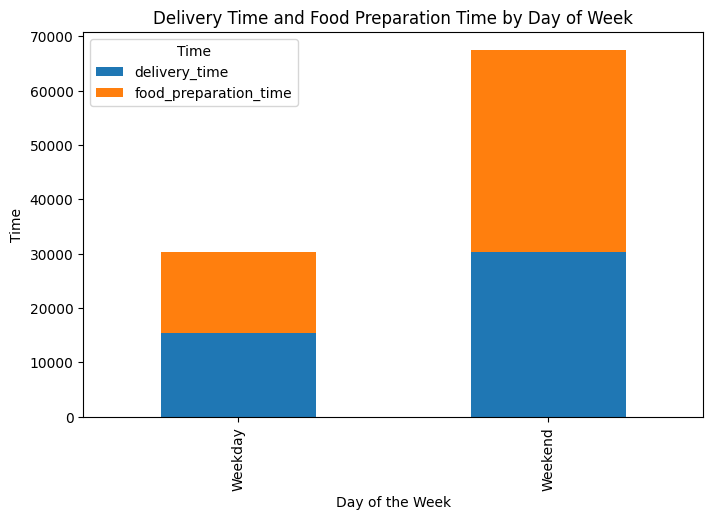

Average food_preparation_time: Weekdays 27
Average food_preparation_time: Weekends 27
Average delivery_time: Weekdays 28
Average delivery_time: Weekends 22


In [ ]:
# Plot stacked bar chart again, but by weekend vs. weekday
df_order_time_grouped_dayofweek = df_order_time.groupby('day_of_the_week')[['delivery_time', 'food_preparation_time']].sum()

# The stacked chart lets us see how the prep vs. delivery times compare by weekends and weekdays
df_order_time_grouped_dayofweek.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Delivery Time and Food Preparation Time by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.legend(title='Time')
plt.show()

# Repeat the average delivery times
print('Average food_preparation_time: Weekdays',round(df[df['day_of_the_week'] == 'Weekday']['food_preparation_time'].mean()))
print('Average food_preparation_time: Weekends',round(df[df['day_of_the_week'] == 'Weekend']['food_preparation_time'].mean()))
print('Average delivery_time: Weekdays',round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()))
print('Average delivery_time: Weekends',round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()))

# OBSERVATIONS
# *   More orders are placed on the weekends for every cuisine
# *   Weekends have longer delivery times
# *   The differences between cuisine type order volume remains largely consistent across each cuisine for weekends vs. weekdays.

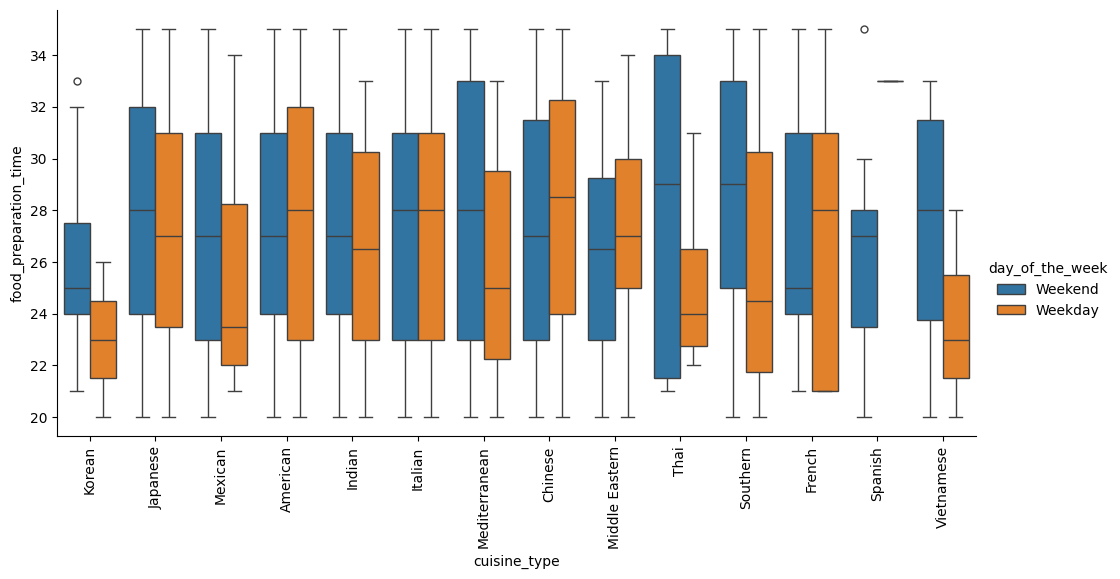

In [ ]:
# Let's see how each cuisine's times differ by Weekday and Weekend

# A catplot is good here because we can plot boxplots side by side for each cuisine type
catplot = sns.catplot(data=df, x='cuisine_type', y='food_preparation_time', hue='day_of_the_week', kind='box', height=5, aspect=2);
catplot.set_xticklabels(rotation=90)
plt.show()

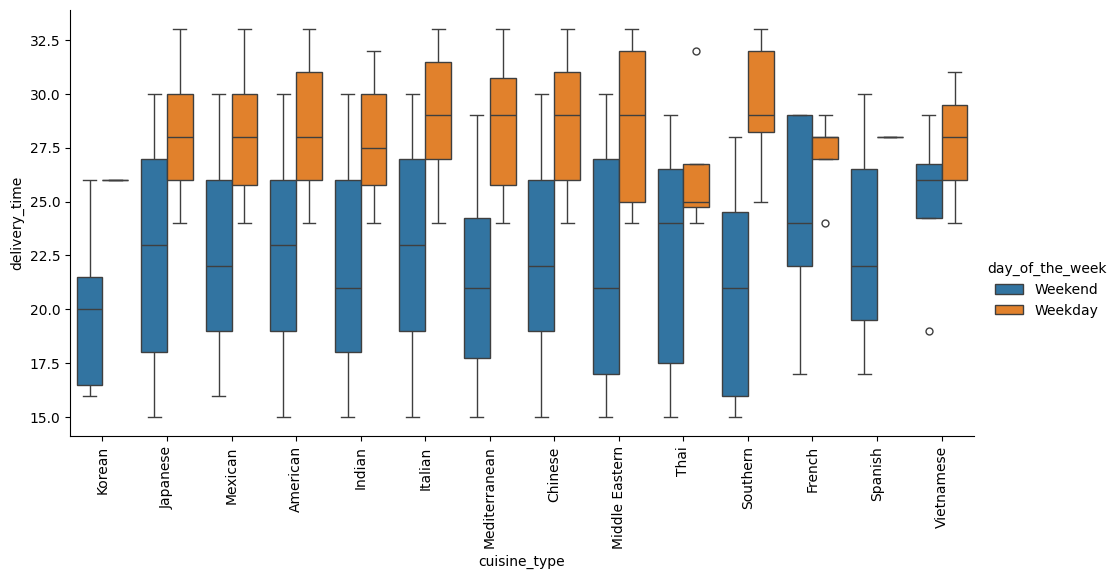

In [ ]:
# Repeat but for delivery time
catplot = sns.catplot(data=df, x='cuisine_type', y='delivery_time', hue='day_of_the_week', kind='box', height=5, aspect=2);
catplot.set_xticklabels(rotation=90)
plt.show()

# OBSERVATIONS
# *   Food preparation time varies greatly between weekend and weekdays greatly for Spanish, Vietamese, Korean and Thai cuisines.
# *   Most other cuisines have similar food preparation times on weekends and weekdays.
# *   All cuisines take longer to deliver during the weekdays than on weekends.
# *   The delivery times on weekends are generally much faster, even though the range is wider.

####Revenue by Restaurant

Let's see which restaurants are bringing in the most money. Specifically, we want to figure out which restaurants have the best company revenue. This could be important for targeting margin improvements.

In [ ]:
# This code was originally in Question 14, but moving it so it can be leveraged earlier.

# Add a new column to store this data
df['company_charge_for_order'] = 0

# Define the function to calculate the revenue and add it back to the dataframe
def calculate_corporate_revenue():
  """ Function to calculate order revenue as a % of cost_of_the_order"""
  for index, row in df.iterrows():
      if row['cost_of_the_order'] > 20:
          df.at[index, 'company_charge_for_order'] = row['cost_of_the_order'] * 0.25
      elif row['cost_of_the_order'] > 5:
          df.at[index, 'company_charge_for_order'] = row['cost_of_the_order'] * 0.15
      else :
          df.at[index, 'company_charge_for_order'] = 0

calculate_corporate_revenue()

In [ ]:
# Group by restaurant corporate revenue and day of week: sum
df_order_time_grouped_restaurant_rev = df.groupby(['restaurant_name', 'day_of_the_week'])[['company_charge_for_order']].sum().sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_restaurant_rev.sort_values(by='company_charge_for_order', ascending=False)
display(df_order_time_grouped_restaurant_rev)

# OBSERVATIONS
# *   Shake Shack is the only restaurant that is a top revenue contributor on the weekends and weekdays
# *   The top 5 restaurants in terms of popularity also bring in the most corporate revenue.
# *   Some restaurants bring in under $1; company may want to consider closing the low-profit restaurants.

,,company_charge_for_order
restaurant_name,day_of_the_week,
Shake Shack,Weekend,455.62
The Meatball Shop,Weekend,308.18
Blue Ribbon Fried Chicken,Weekend,272.38
Shake Shack,Weekday,247.99
Blue Ribbon Sushi,Weekend,247.47
...,...,...
Zero Otto Nove,Weekend,0.88
Haveli Indian Restaurant,Weekend,0.86
Hunan Manor,Weekday,0.86


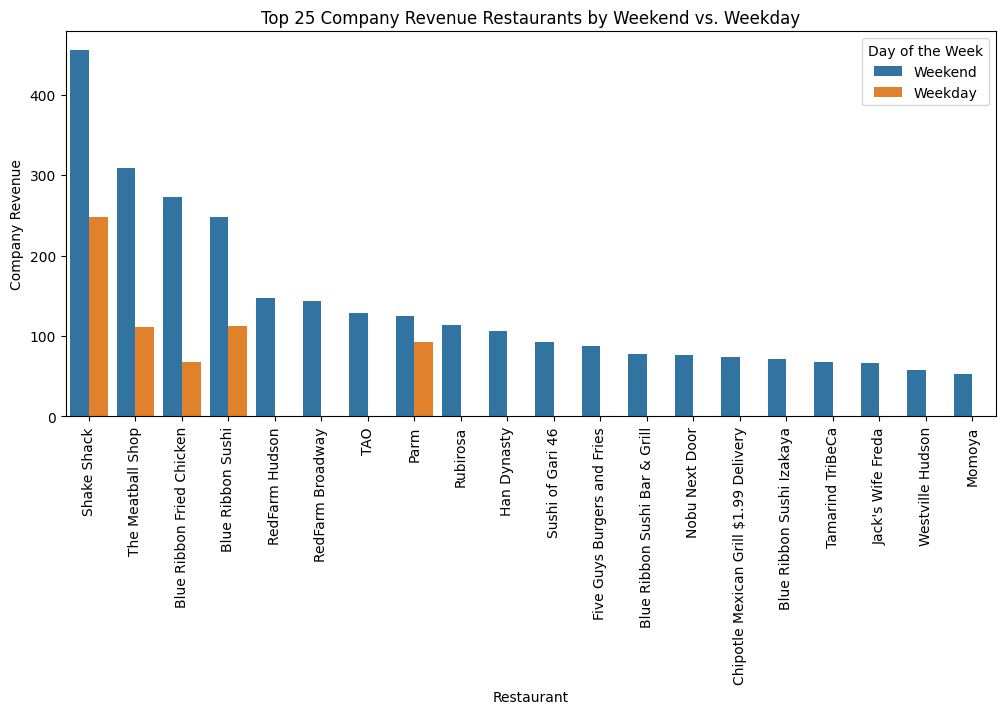

In [ ]:
# Plot the company charge for the order by restaurant for top performing restaurants.
plt.figure(figsize=(12, 5))
sns.barplot(data=df_order_time_grouped_restaurant_rev.head(25), x='restaurant_name', y='company_charge_for_order', hue='day_of_the_week');
plt.title('Top 25 Company Revenue Restaurants by Weekend vs. Weekday')
plt.xlabel('Restaurant')
plt.ylabel('Company Revenue')
plt.xticks(rotation=90)
plt.legend(title='Day of the Week')
plt.show()



In [ ]:
# Group by restaurant corporate revenue and day of week: mean
df_order_time_grouped_restaurant_rev_dow_mean = df.groupby(['restaurant_name', 'day_of_the_week'])[['company_charge_for_order']].mean().sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_restaurant_rev_dow_mean.sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_restaurant_rev_dow_mean

# OBSERVATIONS
# *   The top 5 restaurants in terms of popularity and corporate revenue do not have the highest margins
# *   The same bottom 5 restaurants are revealed here

,,company_charge_for_order
restaurant_name,day_of_the_week,
Tres Carnes,Weekday,8.33
Bhatti Indian Grill,Weekday,8.24
Sarabeth's,Weekday,8.23
Kambi Ramen House,Weekend,8.23
Emporio,Weekend,7.86
...,...,...
Zero Otto Nove,Weekend,0.88
Haveli Indian Restaurant,Weekend,0.86
Hunan Manor,Weekday,0.86


In [ ]:
# Group by restaurant corporate revenue - without day of week: mean
df_order_time_grouped_restaurant_rev_mean = df.groupby(['restaurant_name'])[['company_charge_for_order']].mean().sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_restaurant_rev_mean.sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_restaurant_rev_mean

# OBSERVATIONS
# *   The top 5 restaurants in terms of popularity and corporate revenue do not have the highest margins
# *   Several bottom restaurants generate under $1 per order

,company_charge_for_order
restaurant_name,
Kambi Ramen House,8.23
Emporio,7.86
Bhatti Indian Grill,7.78
Haru Gramercy Park,7.46
Il Bambino,7.31
...,...
Market Table,1.02
Wa Jeal,1.01
Cipriani Le Specialita,0.89


In [ ]:
# Let's add the order totals by restaurant so we can assess profitability be restaurant.

# Group by restaurant and order counts
df_order_time_grouped_restaurant_rev_merge1 = df.groupby(['restaurant_name'])[['order_id']].count().sort_values(by='order_id', ascending=False)
df_order_time_grouped_restaurant_rev_merge1.sort_values(by='order_id', ascending=False)
df_order_time_grouped_restaurant_rev_merge1

# Group by restaurant and company revenue
df_order_time_grouped_restaurant_rev_merge2 = df.groupby(['restaurant_name'])[['company_charge_for_order']].sum().sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_restaurant_rev_merge2.sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_restaurant_rev_merge2


# Group by restaurant and margin
df_order_time_grouped_restaurant_rev_merge3 = df.groupby(['restaurant_name'])[['company_charge_for_order']].mean().sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_restaurant_rev_merge3.sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_restaurant_rev_merge3

# Merge the two
df_grouped_restaurant_rev_merged = pd.merge(df_order_time_grouped_restaurant_rev_merge1, df_order_time_grouped_restaurant_rev_merge2, on='restaurant_name', how='inner')
df_grouped_restaurant_rev_merged_final = pd.merge(df_grouped_restaurant_rev_merged, df_order_time_grouped_restaurant_rev_merge3, on='restaurant_name', how='inner')

# Rename the resulting columns
df_grouped_restaurant_rev_merged_final.rename(columns={'company_charge_for_order_x':'Revenue Sum'},inplace=True)
df_grouped_restaurant_rev_merged_final.rename(columns={'order_id':'Order Count'},inplace=True)
df_grouped_restaurant_rev_merged_final.rename(columns={'company_charge_for_order_y':'Revenue Average'},inplace=True)

In [ ]:
# Display by most company revenue

# Resort final merged dataframe
df_grouped_customer_merged_final_rev = df_grouped_restaurant_rev_merged_final.sort_values(by='Revenue Sum', ascending=False)

# Now, we have a nice, neat chart after all that work that can show the order counts, revenue and average revenue in a single pivot.
print('Company Revenue: Top Restaurants by Total')
df_grouped_customer_merged_final_rev.head(25)

Company Revenue: Top Restaurants by Total


,Order Count,Revenue Sum,Revenue Average
restaurant_name,,,
Shake Shack,219,703.61,3.21
The Meatball Shop,132,419.83,3.18
Blue Ribbon Sushi,119,360.46,3.03
Blue Ribbon Fried Chicken,96,340.20,3.54
Parm,68,218.56,3.21
RedFarm Broadway,59,191.47,3.25
RedFarm Hudson,55,180.93,3.29
TAO,49,167.36,3.42
Han Dynasty,46,149.40,3.25


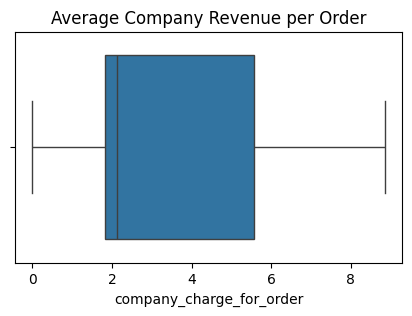

Average Company Margin Per Order: 3.25


,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00
total_order_time,1898.00,51.53,6.83,35.00,47.00,52.00,56.00,68.00
company_charge_for_order,1898.00,3.25,2.30,0.00,1.81,2.12,5.57,8.85


In [ ]:
# Print a boxplot of our new data - we can see it is right-skewed here.
print_boxplot(df, 'company_charge_for_order', 5, 3, 'Average Company Revenue per Order')
print('Average Company Margin Per Order:', round(df['company_charge_for_order'].mean(),2))
df.describe().T

In [ ]:
# Display by highest margin company revenue

# Resort final merged dataframe
df_grouped_customer_merged_final_mean = df_grouped_restaurant_rev_merged_final.sort_values(by='Revenue Average', ascending=False)

print('Company Revenue: Top Restaurants by Total')
df_grouped_customer_merged_final_mean.head(25)

# OBSERVATIONS
# * Most restaurants with very high margins have very few orders. What could they do to promote these restaurants?
# * Company Revenue per order is highly right skewed
#      * Median 50% of restaurants have a margin near $2
#      * The top performing Company Revenue restaurants yield margins near $3


Company Revenue: Top Restaurants by Total


,Order Count,Revenue Sum,Revenue Average
restaurant_name,,,
Kambi Ramen House,1,8.23,8.23
Emporio,1,7.86,7.86
Bhatti Indian Grill,2,15.56,7.78
Haru Gramercy Park,1,7.46,7.46
Il Bambino,1,7.31,7.31
Lucky Strike,1,7.31,7.31
Sarabeth's,3,21.85,7.28
Rohm Thai,1,7.28,7.28
Klong,1,7.26,7.26


In [ ]:
# Display by highest order counts

# Resort final merged dataframe
df_grouped_customer_merged_final_orders = df_grouped_restaurant_rev_merged_final.sort_values(by='Order Count', ascending=False)

print('Company Revenue: Top Restaurants by Order Counts')
df_grouped_customer_merged_final_orders.head(25)



Company Revenue: Top Restaurants by Order Counts


,Order Count,Revenue Sum,Revenue Average
restaurant_name,,,
Shake Shack,219,703.61,3.21
The Meatball Shop,132,419.83,3.18
Blue Ribbon Sushi,119,360.46,3.03
Blue Ribbon Fried Chicken,96,340.20,3.54
Parm,68,218.56,3.21
RedFarm Broadway,59,191.47,3.25
RedFarm Hudson,55,180.93,3.29
TAO,49,167.36,3.42
Han Dynasty,46,149.40,3.25


In [ ]:
# Display by lowest margin company revenue

# Resort final merged dataframe
df_grouped_customer_merged_final_mean = df_grouped_restaurant_rev_merged_final.sort_values(by='Revenue Average', ascending=True)

print('Company Revenue: Lowest Restaurants by Total')
df_grouped_customer_merged_final_mean.head(25)

# OBSERVATIONS
# * A number of restaurants are barely profitable and have very few orders.
# * Three of them are under $1 per order revenue.

Company Revenue: Lowest Restaurants by Total


,Order Count,Revenue Sum,Revenue Average
restaurant_name,,,
Hunan Manor,1,0.86,0.86
Cipriani Le Specialita,1,0.89,0.89
Big Wong Restaurant _¤¾Ñ¼,1,0.89,0.89
Wa Jeal,1,1.01,1.01
Market Table,1,1.02,1.02
La Follia,1,1.21,1.21
'wichcraft,1,1.21,1.21
Woorijip,1,1.24,1.24
Chola Eclectic Indian Cuisine,1,1.31,1.31


In [ ]:
# Get single order unprofitable restaurant data

# Filter for customers with one order and average revenue less than 2
low_order_count = df_grouped_customer_merged_final_mean[(df_grouped_customer_merged_final_mean['Order Count'] == 1) & (df_grouped_customer_merged_final_mean['Revenue Average'] < 2)].count()

print('Company Revenue: Restaurants with single orders and low revenue:', low_order_count['Order Count'])
df_grouped_customer_merged_final_mean[df_grouped_customer_merged_final_mean['Order Count'] == 1]

# OBSERVATIONS
# * Fifty restaurants are barely profitable and have only single orders.
# * Three of them are under $1 per order revenue.

Company Revenue: Restaurants with single orders and low revenue: 22


,Order Count,Revenue Sum,Revenue Average
restaurant_name,,,
Hunan Manor,1,0.86,0.86
Cipriani Le Specialita,1,0.89,0.89
Big Wong Restaurant _¤¾Ñ¼,1,0.89,0.89
Wa Jeal,1,1.01,1.01
Market Table,1,1.02,1.02
La Follia,1,1.21,1.21
'wichcraft,1,1.21,1.21
Woorijip,1,1.24,1.24
Chola Eclectic Indian Cuisine,1,1.31,1.31


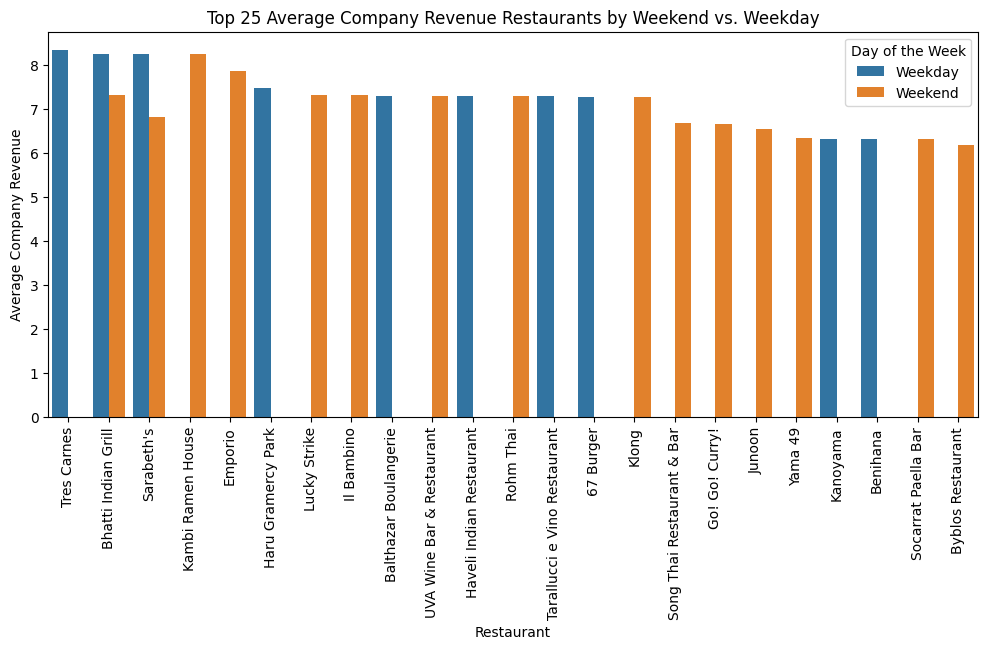

In [ ]:
# Let's now display the company revenue by restaurant and day of week
plt.figure(figsize=(12, 5))
sns.barplot(data=df_order_time_grouped_restaurant_rev_dow_mean.head(25), x='restaurant_name', y='company_charge_for_order', hue='day_of_the_week');
plt.title('Top 25 Average Company Revenue Restaurants by Weekend vs. Weekday')
plt.xlabel('Restaurant')
plt.ylabel('Average Company Revenue')
plt.xticks(rotation=90)
plt.legend(title='Day of the Week')
plt.show()

# OBSERVATIONS
# *  Many top average revenue per order restaurants perform well only for weekday orders. Why?
#      * Tres Carnes
#      * Haru Gamercy Park
#      * Balthazar Boulangerie
#      * Haveli Indian Restaurant
#      * ... and more
# *  Many top average revenue per order restaurants perform well only on weekends. Why?
#      * Kambi Ramen House
#      * Emporio
#      * Lucky Strike
#      * ... and more

####Revenue by Cuisine

Let's see which cuisines are bringing in the most money.


In [ ]:
# Group by cuisine corporate revenue and day of week: sum
df_order_time_grouped_cuisine_dow_rev = df.groupby(['cuisine_type', 'day_of_the_week'])[['company_charge_for_order']].sum().sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_cuisine_dow_rev.sort_values(by='company_charge_for_order', ascending=False)
display(df_order_time_grouped_cuisine_dow_rev)

# OBSERVATIONS
# *   Consistently, the top revenue generating cuisines match the top order types by cuisine, for weekdays and weekends: American, Japanese, Italian and Chinese.
# *   Spanish, Korean, Vietnamese were the lowest revenue cuisines.

,,company_charge_for_order
cuisine_type,day_of_the_week,
American,Weekend,1385.21
Japanese,Weekend,1051.11
Italian,Weekend,664.04
Chinese,Weekend,505.07
American,Weekday,493.06
Japanese,Weekday,427.13
Italian,Weekday,302.84
Chinese,Weekday,184.97
Mexican,Weekend,177.64


In [ ]:
# Group by cuisine corporate revenue and day of week: mean
df_order_time_grouped_cuisine_rev_dow_mean = df.groupby(['cuisine_type', 'day_of_the_week'])[['company_charge_for_order']].mean().sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_cuisine_rev_dow_mean.sort_values(by='company_charge_for_order', ascending=False)
display(df_order_time_grouped_cuisine_rev_dow_mean)

# OBSERVATIONS
#*   On weekdays:
#  *   French, Southern and Middle Eastern orders have the highest margin (over $4).
#  *   Korean, Spanish and Vietnamese have the least margin (under $2).
#*   On weekends:
#  *  Thai, Spanish and French have the most margin (over $4).
#  *  Again, Korean, Spanish and Vietnamese have the least margin (under $2).


,,company_charge_for_order
cuisine_type,day_of_the_week,
French,Weekday,4.64
Thai,Weekend,4.30
Southern,Weekday,4.28
Middle Eastern,Weekday,4.27
Spanish,Weekend,4.13
French,Weekend,4.08
Southern,Weekend,3.92
Middle Eastern,Weekend,3.78
Indian,Weekday,3.58


In [ ]:
# Group by cuisine corporate revenue - without day of week: mean
df_order_time_grouped_cuisine_rev_mean = df.groupby(['cuisine_type'])[['company_charge_for_order']].mean().sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_cuisine_rev_mean.sort_values(by='company_charge_for_order', ascending=False)
display(df_order_time_grouped_cuisine_rev_mean)

,company_charge_for_order
cuisine_type,
French,4.23
Thai,4.11
Southern,4.04
Middle Eastern,3.95
Spanish,3.94
Indian,3.38
Mexican,3.33
Italian,3.24
American,3.22


In [ ]:
# Let's add the order totals by cuisine

# Group by cuisine and order counts
df_order_time_grouped_cuisine_rev_merge1 = df.groupby(['cuisine_type'])[['order_id']].count().sort_values(by='order_id', ascending=False)
df_order_time_grouped_cuisine_rev_merge1.sort_values(by='order_id', ascending=False)
df_order_time_grouped_cuisine_rev_merge1

# Group by cuisine and company revenue
df_order_time_grouped_cuisine_rev_merge2 = df.groupby(['cuisine_type'])[['company_charge_for_order']].sum().sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_cuisine_rev_merge2.sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_cuisine_rev_merge2

# Group by cuisine and margin
df_order_time_grouped_cuisine_rev_merge3 = df.groupby(['cuisine_type'])[['company_charge_for_order']].mean().sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_cuisine_rev_merge3.sort_values(by='company_charge_for_order', ascending=False)
df_order_time_grouped_cuisine_rev_merge3

# Merge the two
df_grouped_cuisine_rev_merged = pd.merge(df_order_time_grouped_cuisine_rev_merge1, df_order_time_grouped_cuisine_rev_merge2, on='cuisine_type', how='inner')
df_grouped_cuisine_rev_merged_final = pd.merge(df_grouped_cuisine_rev_merged, df_order_time_grouped_cuisine_rev_merge3, on='cuisine_type', how='inner')

# Rename the resulting columns
df_grouped_cuisine_rev_merged_final.rename(columns={'company_charge_for_order_x':'Revenue Sum'},inplace=True)
df_grouped_cuisine_rev_merged_final.rename(columns={'order_id':'Order Count'},inplace=True)
df_grouped_cuisine_rev_merged_final.rename(columns={'company_charge_for_order_y':'Revenue Average'},inplace=True)

# Resort merged dataframe
df_grouped_cuisine_rev_merged_final
df_grouped_cuisine_rev_merged_final_sorted = df_grouped_cuisine_rev_merged_final.sort_values(by='Revenue Sum', ascending=False)

print('Top Cuisines by Company Revenue')
display(df_grouped_cuisine_rev_merged_final_sorted)

# OBSERVATION:
# * The top 3 cuisines overall generate the most company revenue.

Top Cuisines by Company Revenue


,Order Count,Revenue Sum,Revenue Average
cuisine_type,,,
American,584,1878.27,3.22
Japanese,470,1478.24,3.15
Italian,298,966.88,3.24
Chinese,215,690.04,3.21
Mexican,77,256.69,3.33
Indian,73,246.99,3.38
Middle Eastern,49,193.55,3.95
Mediterranean,46,136.33,2.96
Thai,19,78.05,4.11


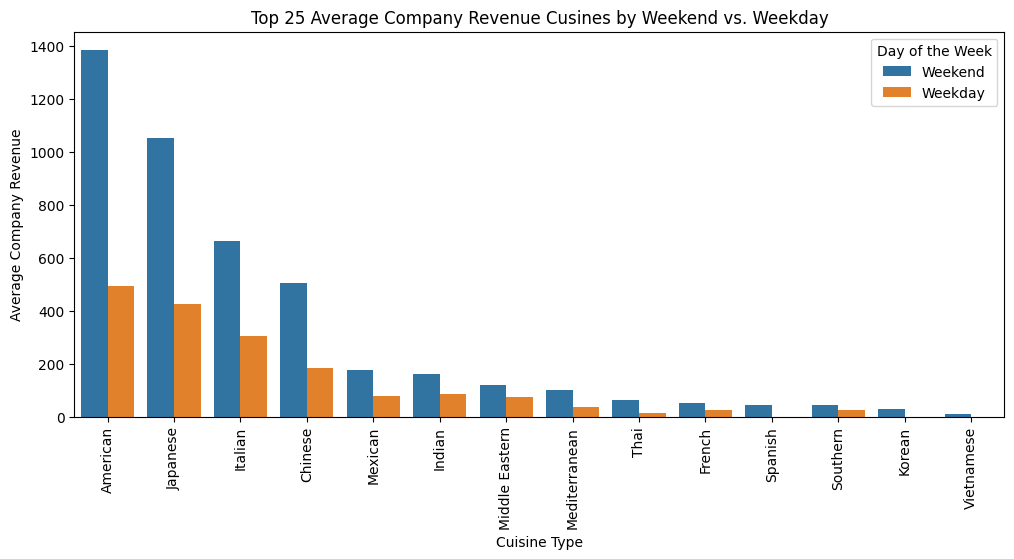

In [ ]:
# Display the top 25 cuisines by revenue and weekday vs. weekend, using the sorted dataframe from earlier.
plt.figure(figsize=(12, 5))
sns.barplot(data=df_order_time_grouped_cuisine_dow_rev.head(25), x='cuisine_type', y='company_charge_for_order', hue='day_of_the_week');
plt.title('Top 25 Average Company Revenue Cusines by Weekend vs. Weekday')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Company Revenue')
plt.xticks(rotation=90)
plt.legend(title='Day of the Week')
plt.show()

In [ ]:
## Get the count of restaurants with only one order
df_singleorder_restaurants = df.groupby('restaurant_name')['order_id'].nunique()
print(df_singleorder_restaurants.count())


178


####Customer Loyalty

Let's see which customers are frequenting which restaurants the most.



In [ ]:
# Group by customer and company revenue
df_grouped_customer_rev = df.groupby('customer_id')[['company_charge_for_order']].sum().sort_values(by='company_charge_for_order', ascending=False)
df_grouped_customer_rev.sort_values(by='company_charge_for_order', ascending=False)

# Group by customer and order counts
df_grouped_customer_orders = df.groupby('customer_id')[['order_id']].count().sort_values(by='order_id', ascending=False)
df_grouped_customer_orders.sort_values(by='order_id', ascending=False)
df_grouped_customer_orders

# Merge the two
df_grouped_customer_merged = pd.merge(df_grouped_customer_orders, df_grouped_customer_rev, on='customer_id', how='inner')

# Resort merged dataframe
df_grouped_customer_merged_sorted = df_grouped_customer_merged.sort_values(by='company_charge_for_order', ascending=False)

print('Top Customers by Company Revenue')
display(df_grouped_customer_merged)


Top Customers by Company Revenue


,order_id,company_charge_for_order
customer_id,,
52832,13,44.90
47440,10,31.60
83287,9,26.24
250494,8,43.62
65009,7,18.22
...,...,...
105903,1,6.08
105992,1,6.08
106006,1,2.42


In [ ]:

# Group by customer and restaurants
df_grouped_customer_restaurants = df.groupby(['customer_id', 'restaurant_name'])[['order_id']].count().sort_values(by='order_id', ascending=False).head(10)
df_grouped_customer_restaurants.sort_values(by='order_id', ascending=False)
display(df_grouped_customer_restaurants)


,,order_id
customer_id,restaurant_name,
97991,Blue Ribbon Sushi Bar & Grill,6
47440,Bareburger,6
97806,Shake Shack,5
84087,The Meatball Shop,5
270525,The Smile,4
276192,Sushi of Gari Tribeca,4
331143,Waverly Diner,4
87006,Nobu Next Door,4
318451,Blue Ribbon Sushi,4


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# See what the ratings are and what data type this is
print('Possible ratings:',df['rating'].unique())

# Get the restaurants that have ratings and convert our data type. Otherwise it appears group by will try to add the values as strings
df_high_rated_restaurants = df[df['rating'].isin(['5', '4', '3'])].copy()
df_high_rated_restaurants['rating'] = df_high_rated_restaurants['rating'].astype('int')

# Group the data by rating so we can get the counts by restaurant
df_high_rated_restaurants_grouped_count = df_high_rated_restaurants.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_high_rated_restaurants_grouped_mean  = df_high_rated_restaurants.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

df_high_rated_restaurants_grouped = pd.merge(df_high_rated_restaurants_grouped_count, df_high_rated_restaurants_grouped_mean, how='inner',on='restaurant_name')

# Rename the resulting columns
df_high_rated_restaurants_grouped.rename(columns={'rating_x':'rating_count'},inplace=True)
df_high_rated_restaurants_grouped.rename(columns={'rating_y':'rating_mean'},inplace=True)

# Filter down
df_high_rated_restaurants_grouped = df_high_rated_restaurants_grouped[(df_high_rated_restaurants_grouped['rating_count'] > 50) & (df_high_rated_restaurants_grouped['rating_mean'] > 4)]

# Count the list
print ('Out of all', df.shape[0], 'restaurants, there are only', df_high_rated_restaurants_grouped.shape[0], 'that meet the promotional criteria.')
display(df_high_rated_restaurants_grouped.head().sort_values(by='rating_mean', ascending=False))

Possible ratings: ['Not given' '5' '3' '4']
Out of all 1898 restaurants, there are only 4 that meet the promotional criteria.


,restaurant_name,rating_count,rating_mean
1,The Meatball Shop,84,4.51
3,Blue Ribbon Fried Chicken,64,4.33
0,Shake Shack,133,4.28
2,Blue Ribbon Sushi,73,4.22


#### Observations:

*   Only 4 restaurants out of 1898 meet the promotional criteria.
*   Consistently, these are the most popular, and most well-performing restaurants.
*   The Meatball Shop has the highest average rating, despite have fewer orders than Shake Shack.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Earlier in our multi-variate analysis, we calculated the corporate charge so we could do some revenue by restaraunt analysis.
# Please refer to "Revenue by Restaurant" for the function and calculations.

#Show the corporate charge we calculated earlier.
print("The company charged a total of:", f'${df["company_charge_for_order"].sum()}', 'for all orders in the dataset.')


The company charged a total of: $6166.303 for all orders in the dataset.


Below is some other useful data related to revenue. Although not specifically requested, these are of value if the company is trying to assess profitability be restaurant based on the company charge for the order.

In [ ]:
# We can use a pivot to easily show the company order charges by restaurant as well.
pivot_company_charges_sum = pd.pivot_table(df, values='company_charge_for_order', index='restaurant_name', aggfunc='sum', margins=True, margins_name='Total').sort_values(by='company_charge_for_order', ascending=False)
display(pivot_company_charges_sum)

,company_charge_for_order
restaurant_name,
Total,6166.30
Shake Shack,703.61
The Meatball Shop,419.83
Blue Ribbon Sushi,360.46
Blue Ribbon Fried Chicken,340.20
...,...
Market Table,1.02
Wa Jeal,1.01
Cipriani Le Specialita,0.89


In [ ]:
# Show the same pivot table, but by average company revenue per order
pivot_company_charges_mean = pd.pivot_table(df, values='company_charge_for_order', index='restaurant_name', aggfunc='mean', margins=True, margins_name='Average').sort_values(by='company_charge_for_order', ascending=False)
display(pivot_company_charges_mean)

,company_charge_for_order
restaurant_name,
Kambi Ramen House,8.23
Emporio,7.86
Bhatti Indian Grill,7.78
Haru Gramercy Park,7.46
Lucky Strike,7.31
...,...
Market Table,1.02
Wa Jeal,1.01
Cipriani Le Specialita,0.89


In [ ]:
# Let's sum the revenue for the top 10

# Calculate the revenue for all restaurants and exclude pivot Total)
revenue_total_all = pivot_company_charges_sum['company_charge_for_order'].sum()

# Calculate the top 10 revenue restaurants
revenue_total_top5 = pivot_company_charges_sum['company_charge_for_order'].iloc[1:6].sum()
revenue_total_top10 = pivot_company_charges_sum['company_charge_for_order'].iloc[1:11].sum()

# Calculate the bottom 10 revenue restaurants
revenue_total_bottom5 = pivot_company_charges_sum['company_charge_for_order'].tail(5).sum()
revenue_total_bottom10 = pivot_company_charges_sum['company_charge_for_order'].tail(10).sum()

print('Top 10 revenue restaurants:', pivot_company_charges_sum['company_charge_for_order'].iloc[1:11],'\n')
print('\nBottom 10 revenue restaurants:', pivot_company_charges_sum['company_charge_for_order'].tail(10),'\n')

# Calculate the 'percent_contribution_y' for each top 10 restaurant
print('Combined, all restaurants generated', f'${revenue_total_all:.2f}', 'in total revenue.')

print('\nThe top 5 restaurants generated', f'${revenue_total_top5:.2f}', 'in revenue.')
print(' * Contribution percentage:', f'{(revenue_total_top5/revenue_total_all) * 100: .2f}%\n')
print('The top 10 restaurants generated', f'${revenue_total_top10:.2f}', 'in revenue.')
print(' * Contribution percentage:', f'{(revenue_total_top10/revenue_total_all) * 100: .2f}%')

# Calculate the 'percent_contribution_y' for the bottom 10 restaurants
print('\nThe bottom 5 restaurants generated', f'${revenue_total_bottom5:.2f}', 'in revenue.')
print(' * Contribution percentage:', f'{(revenue_total_bottom5/revenue_total_all) * 100: .2f}%\n')
print('The bottom 10 restaurants generated', f'${revenue_total_bottom10:.2f}', 'in revenue.')
print(' * Contribution percentage:', f'{(revenue_total_bottom10/revenue_total_all) * 100: .2f}%')

Top 10 revenue restaurants: restaurant_name
Shake Shack                 703.61
The Meatball Shop           419.83
Blue Ribbon Sushi           360.46
Blue Ribbon Fried Chicken   340.20
Parm                        218.56
RedFarm Broadway            191.47
RedFarm Hudson              180.93
TAO                         167.36
Han Dynasty                 149.40
Rubirosa                    140.81
Name: company_charge_for_order, dtype: float64 


Bottom 10 revenue restaurants: restaurant_name
Gaia Italian Cafe               1.32
Chola Eclectic Indian Cuisine   1.31
Woorijip                        1.24
'wichcraft                      1.21
La Follia                       1.21
Market Table                    1.02
Wa Jeal                         1.01
Cipriani Le Specialita          0.89
Big Wong Restaurant _¤¾Ñ¼      0.89
Hunan Manor                     0.86
Name: company_charge_for_order, dtype: float64 

Combined, all restaurants generated $12332.61 in total revenue.

The top 5 restaurants gen

In [ ]:
# Let's look at the top 10 by mean instead of totals
# Calculate the mean
revenue_mean_all = pivot_company_charges_mean['company_charge_for_order'].mean()
revenue_mean_top5 = pivot_company_charges_mean['company_charge_for_order'].iloc[1:6].mean()
revenue_mean_top10 = pivot_company_charges_mean['company_charge_for_order'].iloc[1:11].mean()
revenue_mean_bottom5 = pivot_company_charges_mean['company_charge_for_order'].tail(5).mean()
revenue_mean_bottom10 = pivot_company_charges_mean['company_charge_for_order'].tail(10).mean()

print('Top 10 average company revenue restaurants:', pivot_company_charges_mean['company_charge_for_order'].iloc[0:9],'\n') # no total row to exclude this time
print('Bottom 10 average company revenue restaurants:', pivot_company_charges_mean['company_charge_for_order'].tail(10),'\n')

# Calculate the means each top/bottom restaurant
print('Together, all restaurants averaged', f'${revenue_mean_all:.2f}', 'per order for company revenue.')
print('The top 5 restaurants averaged', f'${revenue_mean_top5:.2f}', 'per order.')
print('The top 10 restaurants averaged', f'${revenue_mean_top10:.2f}', 'per order.')

print('The bottom 5 restaurants averaged', f'${revenue_mean_bottom5:.2f}', 'per order.')
print('The bottom 10 restaurants averaged', f'${revenue_mean_bottom10:.2f}', 'per order.')


Top 10 average company revenue restaurants: restaurant_name
Kambi Ramen House     8.23
Emporio               7.86
Bhatti Indian Grill   7.78
Haru Gramercy Park    7.46
Lucky Strike          7.31
Il Bambino            7.31
Sarabeth's            7.28
Rohm Thai             7.28
67 Burger             7.26
Name: company_charge_for_order, dtype: float64 

Bottom 10 average company revenue restaurants: restaurant_name
Gaia Italian Cafe               1.32
Chola Eclectic Indian Cuisine   1.31
Woorijip                        1.24
'wichcraft                      1.21
La Follia                       1.21
Market Table                    1.02
Wa Jeal                         1.01
Cipriani Le Specialita          0.89
Big Wong Restaurant _¤¾Ñ¼      0.89
Hunan Manor                     0.86
Name: company_charge_for_order, dtype: float64 

Together, all restaurants averaged $3.26 per order for company revenue.
The top 5 restaurants averaged $7.54 per order.
The top 10 restaurants averaged $7.35 per orde

#### Observations:

*   The company charged a total of: $6166.30 to all restaurants
*   As expected, the top 5 restaurants for orders are also the highest-revenue restaurants based on total.
*   However, the restaurants with the highest margins have lower order counts.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# To do this, we need to understand both time series values: food preparation and delivery times
# Earlier, we calculated total delivery time and added a new column to the dataframe. We will reuse this here

# find all orders with times longer than 60 minutes
df_greater_than_60 = df[df['total_order_time'] > 60]

print('Out of', df.shape[0], 'orders,', df_greater_than_60.shape[0], 'take more than 60 minutes to deliver from the time the order is placed.')
print('The orders that take an hour or more represent', f'{(df_greater_than_60.shape[0]/df.shape[0]) * 100: .2f}%', 'of orders.')

Out of 1898 orders, 200 take more than 60 minutes to deliver from the time the order is placed.
The orders that take an hour or more represent  10.54% of orders.


#### Observations:

*   Out of 1898 orders, 200 take longer than an hour from order to delivery.
*   This represents 10.54% of all orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean for weekdays
weekday_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Get the mean for weekends
weekend_mean = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print('On weekdays, the average order delivery time is about:',round(weekday_mean), 'minutes.')
print('On weekends, the average order delivery time is about:',round(weekend_mean), 'minutes.')


On weekdays, the average order delivery time is about: 28 minutes.
On weekends, the average order delivery time is about: 22 minutes.


#### Observations:

*   On weekdays, orders deliver in about 28 minutes on average.
*   On weekends, delivery is slightly faster at about 22 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

**Weekends vs. Weekdays**

* The dataset includes many more weekend orders than weekday orders. Assuming the dataset represents all orders during the same timeframe, we can conclude that weekends are much more popular for deliveries.

  * On weekends, 1351 orders were placed (71% of our dataset).

  * On weekdays, that number drops to 547 orders (29% of our dataset).

**Cuisine Types**
*  The same cuisines are consistently most popular on weekends and weekdays:
     * American          584 orders (30.7%)
     * Japanese          470 orders (24.7%)
     * Italian           298 orders (15.7%)

*  The three least cuisine types follow suit:
     * Korean           13 orders (0.68%)
     * Spanish          12 orders (0.63%)
     * Vietnamese        7 orders (0.37%)

A few other interesting observations around cuisines:

*   American and Japanese order costs fall within a small range around \$16, and are also the most popular types of food to order.

*   Thai, Korean, Southern, French, Spanish and Vietnamese have a wider range of order costs and have fewer orders.

*   Thai and French have the highest median orders costs of all cuisines.

*   Vietnamese has the lowest order cost, yet also the lowest order volume.

*   Southern and Spanish food deliveries have a pronounced longer total order time during weekdays.

*   Vietnamese is the only cusine that with a faster overall order time during the week than on weekdays.

**Delivery Times**

* Most orders delivered between 25 and 30 minutes, about half of which is food preparation, for any given cuisine.

* Most of the ratings for orders were provided during the same time period, making 25 to 30 minutes a good baseline target for assessing on-time delivery performance.

*  On weekends, delivery times are approximately 6 minutes slower on average. This could be due to multiple reasons, such as staffing and/or traffic in the city, or how far away the delivery person or customer is from the restaurant.

* A relationship exists between delivery times and certain ratings.
  *   Orders rated a 3 generally took longer to deliver, especially meals that took close to an hour to deliver.
  *   Orders rated a 4 generally took the least time to deliver.
  *   More 5 ratings occurred for orders delivering between 24 and 30 minutes, corresponding with the fact that most deliveries occurred during this timeframe.
  * Many 5 ratings were still issued for orders taking over 40 minutes to deliver.

**Ratings**

* The number of ratings by cuisine remains proportionate to the order volume.

* Most ratings are provided when meals cost between approximately 9 and 16 dollars.

* For orders that received ratings, the average rating is 4.34.

* However, a high number of orders did not receive a rating (736, or 39%).

* Of the rated orders, the breakdown is as follows:
    * 588 orders were rated 5 (31%).
    * 386 orders were rated 4 (20%).
    * The remaining 188 orders were rated 3 (10%).

*  Orders costing between 10 and 15 dollars had a significantly higher count of 5 ratings. This makes sense since most orders fall near this price point.
  
**Order Volume**

* The Top 5 performing restaurants in terms of order volume accounted for nearly 25% of the company's revenue margin:
     * Shake Shack:                  219 (11.5% of margin)
     * The Meatball Shop:            132 (6.9% of margin)
     * Blue Ribbon Sushi:            119 (6.2% of margin)
     * Blue Ribbon Fried Chicken:    96 (5.1% of margin)
     * Parm:                         68 orders (3.6% of margin)

* There were 178 restaurants with only a single order.
  *  Three of these generate less than \$1 on average per order.
  *  Margins for some restaurants with single orders is very high (nearly \$8).

**Revenue**

*  Weekends generate much more revenue than weekdays. Restaurant location may impact weekends vs. weekday data, if restaurants are primarily in residential vs. business areas of the city.

* Combined, all restaurants generated \$12,332.61 in total revenue.
  * Top 5 generated \$2,042.66 in revenue.
    * Contribution percentage:  16.56%
  * Bottom 5 restaurants generated \$4.66 in revenue.
    * Contribution percentage:  0.04%

*  The same Top 3 restaurants for order volume also generated the most revenue and company revenue (margin), accounting for over 30% of the total revenue of \$10,403.74.
     * Shake Shack:                 \$3579.53 total revenue (703.61 margin)
     * The Meatball Shop:           \$2145.21 total revenue (419.83 margin)
     * Blue Ribbon Sushi:           \$1903.95 total revenue (360.46 margin)

* Company charge margin for five restaurants is under $1 per order:  
  *   Market Table:                    \$1.09
  *   Wa Jeal:                         \$1.01
  *   Cipriani Le Specialita:          \$0.89
  *   Big Wong Restaurant:             \$0.89
  *   Hunan Manor:                     \$0.86

* 50% of restaurants have a margin near \$2 per order.

* Top performing restaurants yield margins closer to \$3 per order.  


  


### Recommendations:

**Dataset**
*  The dataset is missing information that could help with further analysis. The following data should be added, if possible:
   * Restaurant location (GPS coordinates)
   * Delivery location (GPS coordinates)
   * Delivery person mode of transport (example: car, bicycle, pedestrian, subway)
   * Delivery day of week and hour of day

**Cuisine Types**

*   American and Japanese order costs fall within a small range around $16.
*   Since they are popular, generate the most revenue, and have above-average margins, the company could target promotions to customers who frequently order this type of cuisine.

**Order Volume**

*   Further analysis of restaurants with single orders will help identify what is contributing to low order volume.
  *  Consider ways to promote single-order restaurants with high margins.
  *  Consider halting deliveries for restaurants with low order volume and low margins.

**Ratings**

* About 39% of orders do not have delivery ratings, largely weekday orders.

* To help incentivize gathering more ratings, FoodHub could offer:
    *  Discount codes or prizes for customers who complete surveys
    *  Expedient, SMS-based rating solution that texts customers right after food delivery and lets them respond with a simple rating (example: 4).
    
*  Restaurants with highest ratings or margins (company revenue charge per order) aren't necessarily the most popular or profitable ones.
  * Top 10 restaurants by volume are not the most highly rated.
  * Top 10 restaurants by margin do not have high order counts.
  * Distribution of ratings is not that different on weekends vs. weekdays.

**Delivery Times**

* Given our earlier insight on delviery time, the restaurant could consider creating a "delivery tracker" to predict when a customer's meal will deliver. This would help meet customer expectations.

* Since over 10% of orders take more than an hour to deliver, the company should focus on improving this metric.

  *  Delivery persons could be motivated by receiving bonuses or "preferred" customer" orders, based on their individual delivery times.
      *    Additional delivery instance data is needed. We cannot tell if orders deliver one at a time, or are bundled.
      *    We also do not know the mode of delivery.

  *  FoodHub could work on algorithms to assign deliveries to nearby delivery persons, based on understanding the food preparation and historical delivery times for addresses.

*  FoodHub should increase staffing for weekends vs. weekdays. Additional analysis by specific days of the week could also be helpful for planning delivery person shifts.

     *    Additional data and analysis are needed to examine relationships between:
          *  Delivery person proximity to restaurants
          *  Customer proximity to restaurants
          *  Geographical details and delivery timestamps by order
          *  Geographical details by rating category

*  Restaurants with single orders could be negatively impacting the availability of delivery staff. If deliveries could be bundled by pickup an location proximities, delivery staff could increase efficiency by picking up and delivering multiple orders in a single delivery run.

**Company Revenue**

*  Half of the restaurants are underperforming, generating only \$2.12 per order (below the average of 3.25).
  * More data analysis by restaurant is recommended here to identify root cause.

*   To maximize company revenue, FoodHub could consider:
  *   Offering promotions for orders for restaurants with the highest per-order margins, yet low order volume.
  *   Stop deliveries for restaurants generating under $1 per order. This would allow diverting delivery staff to more profitable orders.
  *   Offer weekday promotions for the highest-performing weekend restaurants.



In [ ]:
# Create an HTML version of this notebook - do this last
 %%shell
 jupyter nbconvert --to html '/content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/0-Python Foundations/Project/PYF_Project_LearnerNotebook_FullCode - Tuesday Frase.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/0-Python Foundations/Project/PYF_Project_LearnerNotebook_FullCode - Tuesday Frase.ipynb to html
[NbConvertApp] Writing 896459 bytes to /content/drive/MyDrive/Learning/Data Coursework/PGP-DSBA/0-Python Foundations/Project/PYF_Project_LearnerNotebook_FullCode - Tuesday Frase.html
